# DataCamp (Python)

##  Dimensionality Reduction in Python                 


In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Dimensionality Reduction in Python/"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.ensemble import GradientBoostingRegressor

In [4]:
from sklearn.manifold import TSNE
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE

from sklearn.decomposition import PCA

##    CHAPTER 1  - Exploring high dimensional data

#### Exercício 1 - Introduction

In [5]:
#vídeo

pokemon_df = pd.read_csv(data_folder + "pokemon.csv")

# When to use dimensionality reduction?
pokemon_df.describe()
#  se uma variável for sempre a mesma e n variar por exemplo

pokemon_df.describe(exclude='number')


Name Type 1  Type 2 Legendary
count    800    800     414       800
unique   800     18      18         2
top     Xatu  Water  Flying     False
freq       1    112      97       735

Exercício 2

In [6]:
# Finding the number of dimensions in a dataset
# A larger sample of the Pokemon dataset has been loaded for you as the Pandas dataframe pokemon_df.

# How many dimensions, or columns are in this dataset?
# Answer: 13 (no exercício são 7: (160, 7))
print(pokemon_df.shape)

pokemon_df.head()

(800, 13)


#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

Exercício 3

In [7]:
# Removing features without variance

# Remove the feature without variance from this list
number_cols = ['HP', 'Attack', 'Defense', 'Generation']

print(pokemon_df[number_cols].describe())

# no exercício a variável 'Generation' tinha std = 0, por isso agora a lista passa a ser:
number_cols = ['HP', 'Attack', 'Defense']

print("\n====================================================================\n")

# Remove the feature without variance from this list (mudei 'Type' para 'Type 1')
non_number_cols = ['Name', 'Type 1', 'Legendary']

print(pokemon_df[non_number_cols].describe())

# na lista é 'Legendary', por isso:
non_number_cols = ['Name', 'Type 1']

# Create a new dataframe by subselecting the chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

print("\n====================================================================\n")

print("""\nAll Pokemon in this dataset are non-legendary and from generation one so you could choose to drop 
those two features.""")

df_selected.head()

               HP      Attack     Defense  Generation
count  800.000000  800.000000  800.000000   800.00000
mean    69.258750   79.001250   73.842500     3.32375
std     25.534669   32.457366   31.183501     1.66129
min      1.000000    5.000000    5.000000     1.00000
25%     50.000000   55.000000   50.000000     2.00000
50%     65.000000   75.000000   70.000000     3.00000
75%     80.000000  100.000000   90.000000     5.00000
max    255.000000  190.000000  230.000000     6.00000


        Name Type 1 Legendary
count    800    800       800
unique   800     18         2
top     Xatu  Water     False
freq       1    112       735



All Pokemon in this dataset are non-legendary and from generation one so you could choose to drop 
those two features.


HP  Attack  Defense                   Name Type 1
0  45      49       49              Bulbasaur  Grass
1  60      62       63                Ivysaur  Grass
2  80      82       83               Venusaur  Grass
3  80     100      123  VenusaurMega Venusaur  Grass
4  39      52       43             Charmander   Fire

#### Exercício 4 - Feature selection vs feature extraction

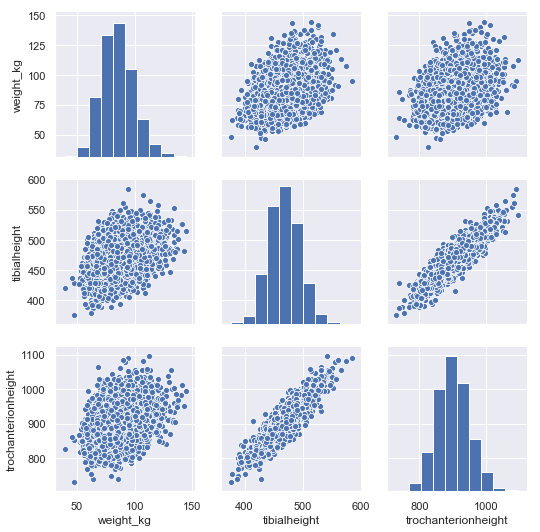

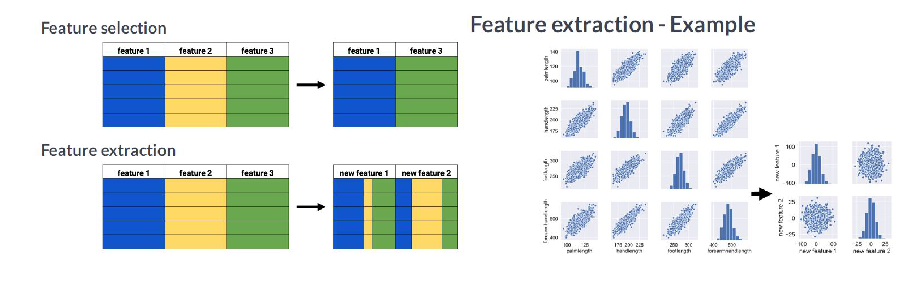

Feature extraction: por exemplo nos gráficos daqui podemos reduzir tibialheight e trochanterionheight 
para 1 dimensão apenas, usando PCA


In [8]:
#vídeo

# Why reduce dimensionality?
# Your dataset will:
#  - be less complex
#  - require less disk space
#  - require less computation time
#  - have lower chance of model over

####################################################

# Feature selection
# insurance_df.drop('favorite color', axis=1) --> não interessava para o efeito

# Building a pairplot on ANSUR data
ansur_df = pd.read_csv(data_folder + "ANSUR_II_MALE.csv")

sns.pairplot(ansur_df[['weight_kg', 'tibialheight', 'trochanterionheight']], diag_kind='hist')
plt.show()
# não havia na base de dados que eles disponibilizaram mas se houvesse uma correlação 1 n era necessário 1 delas
# se fosse na vertical também (constantes)

#####################################################

# Feature selection vs Feature extraction
plt.subplot(1, 2, 1)
image = plt.imread(data_folder + "feature_selection_extraction.jpg")
plt.axis('off')
plt.imshow(image)

# Feature extraction example
plt.subplot(1, 2, 2)
image = plt.imread(data_folder + "feature_extraction_example.jpg")
plt.axis('off')
plt.imshow(image)

plt.subplots_adjust(left=0, bottom=-0.5, right=2, top=1, wspace=0, hspace=0)
plt.show()

print("""Feature extraction: por exemplo nos gráficos daqui podemos reduzir tibialheight e trochanterionheight 
para 1 dimensão apenas, usando PCA""")

Exercício 5

ansur_df_1


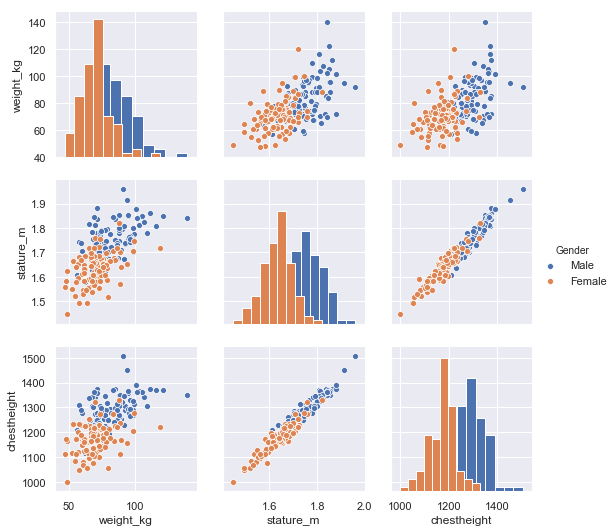

Two features are basically duplicates, remove one of them from the dataset. 
      Aqui vou assumir a q escolhi: 'chestheight'. Não está tão perfeito (com 'stature_m') mas vou assumir como se fosse
      uma reta.


C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


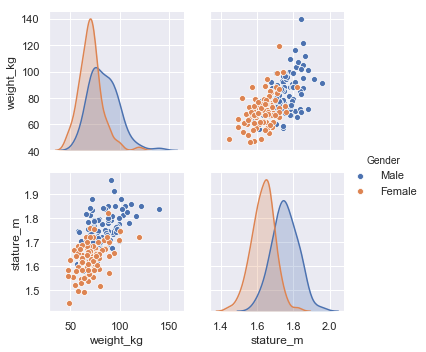

In [9]:
# Visually detecting redundant features

################################################################################################

# preparação dos dados (troquei 'body_height' deles por 'chestheight')
ansur_df_female = pd.read_csv(data_folder + "ANSUR_II_FEMALE.csv")[['Gender', 'weight_kg', 'stature_m', 'chestheight', 
                                                                    'footlength', 'headlength']][:100]
ansur_df_male = pd.read_csv(data_folder + "ANSUR_II_MALE.csv")[['Gender', 'weight_kg', 'stature_m', 'chestheight',
                                                                'footlength', 'headlength']][:100]
ansur_df_female['n_legs'] = 2
ansur_df_male['n_legs'] = 2

ansur_df_1 = pd.concat([ansur_df_male[['Gender', 'weight_kg', 'stature_m', 'chestheight']], 
                        ansur_df_female[['Gender', 'weight_kg', 'stature_m', 'chestheight']]], axis=0)

ansur_df_2 = pd.concat([ansur_df_male[['Gender', 'footlength', 'headlength', 'n_legs']], 
                        ansur_df_female[['Gender', 'footlength', 'headlength', 'n_legs']]], axis=0)

##################################################################################################
print("ansur_df_1")

# Create a pairplot and color the points using the 'Gender' feature of ansur_df_1
sns.pairplot(ansur_df_1, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

print("""Two features are basically duplicates, remove one of them from the dataset. 
      Aqui vou assumir a q escolhi: 'chestheight'. Não está tão perfeito (com 'stature_m') mas vou assumir como se fosse
      uma reta.""")

# Remove one of the redundant features
ansur_df_1.drop('chestheight', axis=1, inplace=True)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_1, hue='Gender')

# Show the plot
plt.show()

##########################################################################
print("\n=============================================================================================\n")


ansur_df_2


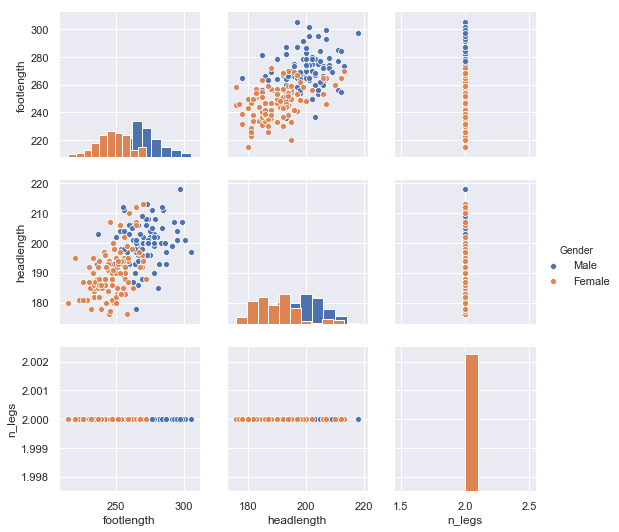

Remove the redundant feature


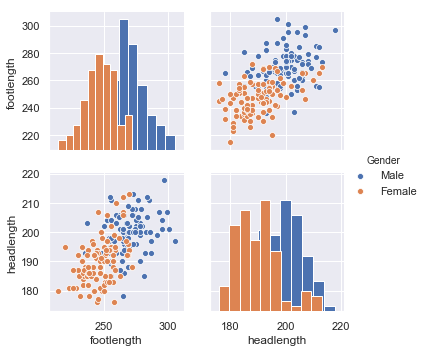

In [10]:
print("ansur_df_2")

# Now create a pairplot of the ansur_df_2 data sample and colour the points using the 'Gender' feature.

sns.pairplot(ansur_df_2, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

print("Remove the redundant feature")

# Remove the redundant feature
ansur_df_2.drop('n_legs', axis=1, inplace=True)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_2, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

Exercício 6

In [11]:
# Advantage of feature selection

# What advantage does feature selection have over feature extraction?

# Answer: The selected features remain unchanged, and are therefore easy to interpret.

#### Exercício 7 - t-SNE visualization of high-dimensional data

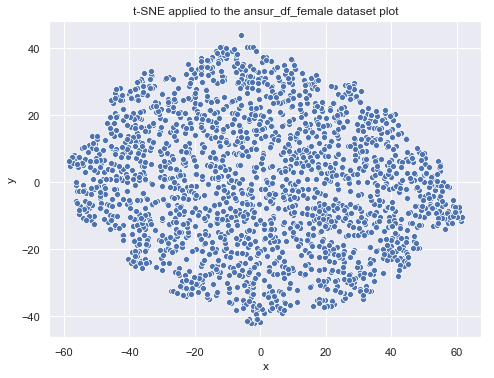

One big cluster. This makes sense, since there are no distinct groups of female body shapes, with
little in between. Instead, there is a more continuous distribution of body shapes.

However, using the categorical features we excluded from the analysis, we can check if there are interesting
structural patterns within this cluster.


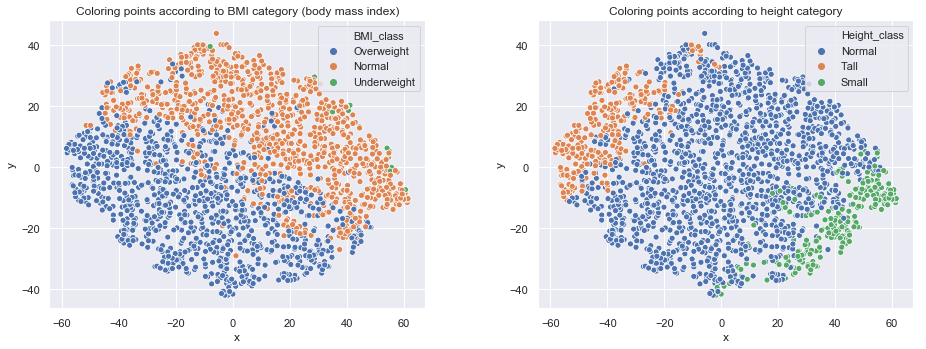

The BMI class indeed shows a pattern. From the 90+ features in the dataset, t-SNE picked up that weight
explains a lot of the variance in the dataset.

Regarding the Height class, we see that, now in the vertical direction, variance is explained by a person's
height.

In conclusion, t-SNE helps to visualy explore our dataset and identify the most important drivers of variance in
body shapes.


In [12]:
#vídeo

# Conceito:
# t-SNE: t-distributed stochastic neighbor embedding (nonlinear dimensionality reduction technique)
# it's visualizing high dimensional data using feature extraction
# it will maximize in distance in a 2-dimensional space observations that are different in high-dimensional space (cluster)

# t-SNE on IRIS dataset (deu para distinguir claramente no gráfico 2 clusters)

# t-SNE on female ANSUR dataset
ansur_df_female = pd.read_csv(data_folder + "ANSUR_II_FEMALE.csv")
ansur_df_female.shape  # (1986, 99)

# retirar dados categóricos --> t-SNE doesn't work w/ non-numerical data (podíamos ter usado OneHot Encoding ou pd.dummies)

non_numeric = ['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch']

ansur_df_female_numeric = ansur_df_female.drop(non_numeric, axis=1)
ansur_df_female_numeric.shape  # (1986, 94)

#####

# Fitting t-SNE
from sklearn.manifold import TSNE

m = TSNE(learning_rate=50)

# while fitting to the dataset, TSNE will try different configurations and evaluate these with an internal cost function.
# High learning rates will cause the algorithm to be more adventurous in the configuration it tries out while low learning
#  rates will make it more conservative. Usually, learning rates are between 10 - 1000 range

tsne_features = m.fit_transform(ansur_df_female_numeric)  # this will project our high dimensional data set onto
                                                          # a numpy array with 2 dimensions

tsne_features[1:4,:]

# Assigning t-SNE features to our dataset

ansur_df_female['x'] = tsne_features[:,0]
ansur_df_female['y'] = tsne_features[:,1]

####

# Plotting t-SNE

sns.scatterplot(x="x", y="y", data=ansur_df_female)
plt.title("t-SNE applied to the ansur_df_female dataset plot")
plt.subplots_adjust(left=0, bottom=-0.1, right=1, top=1, wspace=0, hspace=0)
plt.show()

print("""One big cluster. This makes sense, since there are no distinct groups of female body shapes, with
little in between. Instead, there is a more continuous distribution of body shapes.

However, using the categorical features we excluded from the analysis, we can check if there are interesting
structural patterns within this cluster.""")


# Coloring points according to BMI category
plt.subplot(1, 2, 1)
sns.scatterplot(x="x", y="y", hue='BMI_class', data=ansur_df_female)
plt.title("Coloring points according to BMI category (body mass index)")

# Coloring points according to height category
plt.subplot(1, 2, 2)
sns.scatterplot(x="x", y="y", hue='Height_class', data=ansur_df_female)
plt.title('Coloring points according to height category')
plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.3, hspace=0)
plt.show()

print("""The BMI class indeed shows a pattern. From the 90+ features in the dataset, t-SNE picked up that weight
explains a lot of the variance in the dataset.\n""")

print("""Regarding the Height class, we see that, now in the vertical direction, variance is explained by a person's
height.\n""")

print("""In conclusion, t-SNE helps to visualy explore our dataset and identify the most important drivers of variance in
body shapes.""")


Exercício 8

In [13]:
# t-SNE intuition

# t-SNE is super powerful, but do you know exactly when to use it?
# What is a good use case to use t-SNE?

# When you want to visually check if two groups within your dataset differ significantly.
# When you want to visually explore the patterns in a high dimensional dataset.               (True)
# When you want to know the importance of specific features in a dataset.
# When you want to sub-select the two most important features present in your dataset.


Exercício 9

In [14]:
%%time
# Fitting t-SNE to the ANSUR data (male + female)

# vou fazer com os dados masculinos e femininos
ansur_df_male = pd.read_csv(data_folder + "ANSUR_II_MALE.csv")
ansur_df_female = pd.read_csv(data_folder + "ANSUR_II_FEMALE.csv")
ansur_df = pd.concat([ansur_df_male, ansur_df_female], axis=0)

###########################################

from sklearn.manifold import TSNE   

# Non-numerical columns in the dataset
non_numeric = ['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch']

# Drop the non-numerical columns from df
df_numeric = ansur_df.drop(non_numeric, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
print(tsne_features)

# t-SNE reduced the more than 90 features in the dataset to just 2 which you can now plot.

[[ -0.97687405  17.406147  ]
 [-22.157637    13.177869  ]
 [ 15.907667    13.434435  ]
 ...
 [ 15.706939   -34.878952  ]
 [ -5.810329   -49.96114   ]
 [-11.767732   -36.713478  ]]
Wall time: 1min 46s


Exercício 10

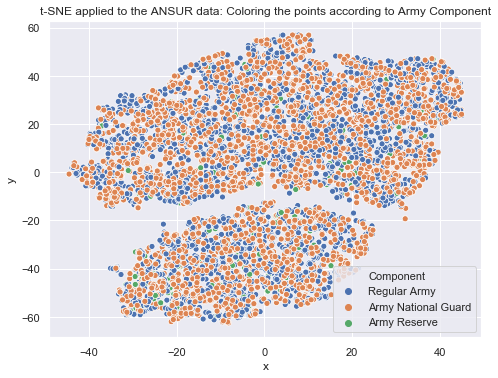

In [15]:
# t-SNE visualisation of dimensionality

# Adding t-SNE features to our dataset
ansur_df['x'] = tsne_features[:, 0]
ansur_df['y'] = tsne_features[:, 1]

# Color the points according to Army Component
sns.scatterplot(x="x", y="y", hue='Component', data=ansur_df)
plt.title("t-SNE applied to the ANSUR data: Coloring the points according to Army Component")

# Show the plot
plt.subplots_adjust(left=0, bottom=-0.1, right=1, top=1, wspace=0, hspace=0)
plt.show()

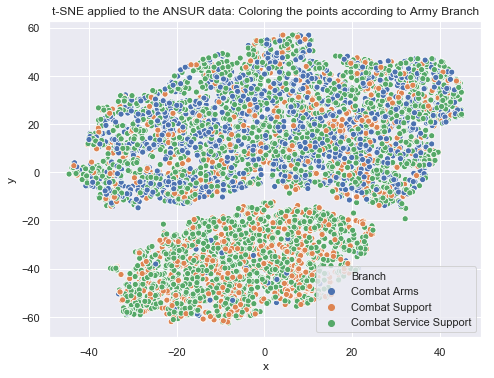

In [16]:
# Color the points according to Army Branch
sns.scatterplot(x="x", y="y", hue='Branch', data=ansur_df)
plt.title("t-SNE applied to the ANSUR data: Coloring the points according to Army Branch")

# Show the plot
plt.subplots_adjust(left=0, bottom=-0.1, right=1, top=1, wspace=0, hspace=0)
plt.show()

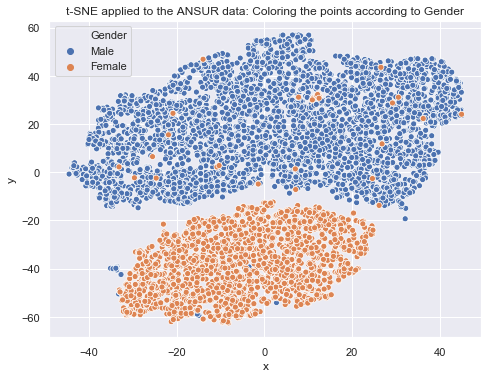

In [17]:
# Color the points according to Gender
sns.scatterplot(x="x", y="y", hue='Gender', data=ansur_df)
plt.title("t-SNE applied to the ANSUR data: Coloring the points according to Gender")

# Show the plot
plt.subplots_adjust(left=0, bottom=-0.1, right=1, top=1, wspace=0, hspace=0)
plt.show()

In [18]:
print("""There is a Male and a Female cluster. t-SNE found these gender differences in body shape without being told about
them explicitly. 

Now from the second plot you learn there are more males in the Combat Arms Branch. 
From the first plot, regarding Army Components, it is almost equally distributed among man and women.""")

There is a Male and a Female cluster. t-SNE found these gender differences in body shape without being told about
them explicitly. 

Now from the second plot you learn there are more males in the Combat Arms Branch. 
From the first plot, regarding Army Components, it is almost equally distributed among man and women.


# CHAPTER 2 - Feature selection I, selecting for feature information

#### Exercício 1 - The curse of dimensionality

In [19]:
#vídeo

# From observation to pattern - why models overfit with many dimensions/columns/variables

# Building a city classier - data split
# house_df = pd.read_csv(data_folder + "")
exemplo_meu = ansur_df.copy()
non_numeric = ['BMI_class', 'Gender', 'Component', 'Branch']
exemplo_meu = exemplo_meu.drop(non_numeric, axis=1)

# Separate the feature we want to predict from the ones to train the model on.
y = exemplo_meu['Height_class']
X = exemplo_meu.drop('Height_class', axis=1)

# Perform a 70% train and 30% test data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create a Support Vector MachineClassier and fit to training data
from sklearn.svm import SVC
svc = SVC(gamma='scale')
svc.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, svc.predict(X_test)))
print(accuracy_score(y_train, svc.predict(X_train)))

# Adding features
exemplo_meu['exemplo1'] = np.random.randint(1, 40, size=(exemplo_meu.shape[0], 1))
exemplo_meu['exemplo2'] = np.random.randint(1, 70, size=(exemplo_meu.shape[0], 1))

# the number of observations should increase exponentially with the adding of features 
# (the problem is the curse of dimensionality)

0.9472817133443163
0.9879915234283023


Exercício 2

In [20]:
# Train - test split

# ANSUR dataset: predict Gender
ansur_df2 = ansur_df.drop(['BMI_class', 'Height_class', 'Component', 'Branch'], axis=1)
 
# Import train_test_split()
from sklearn.model_selection import train_test_split

# Select the Gender column as the feature to be predicted (y)
y = ansur_df2['Gender']

# Remove the Gender column to create the training data
X = ansur_df2.drop('Gender', axis=1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))


1821 rows in test set vs. 4247 in training set. 96 Features.


Exercício 3

In [21]:
# Fitting and testing the model

# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

# com gamma='scale' fica 99,7%. Vou deixar para perceber a conclusão seguinte

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


66.4% accuracy on test set vs. 100.0% on training set


Exercício 4

In [22]:
# Accuracy after dimensionality reduction

# In this case, you'll apply a rather drastic from of dimensionality reduction by only selecting a single column that has
# some good information to distinguish between genders. 

# Assign just the 'neckcircumferencebase' column from ansur_df to X
X = ansur_df[['neckcircumferencebase']]

# Split the data, instantiate a classifier and fit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC()
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set\n".format(accuracy_test, accuracy_train))

print("""On the full dataset the model is rubbish but with a single feature we can make good predictions. This is an example
of the curse of dimensionality. The model badly overfits when we feed it too many features. It overlooks that neck 
circumference by itself is pretty different for males and females.""")


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


92.0% accuracy on test set vs. 93.7% on training set

On the full dataset the model is rubbish but with a single feature we can make good predictions. This is an example
of the curse of dimensionality. The model badly overfits when we feed it too many features. It overlooks that neck 
circumference by itself is pretty different for males and females.


#### Exercício 5 - Features with missing values or little variance

(6068, 94)
whether each feature variance is above the threshold (1) or not
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True]
(6068, 93)


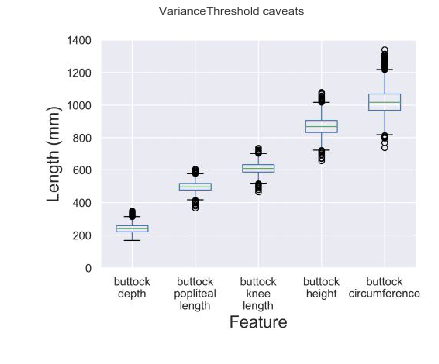

Normalizing the variance before feature selection: divide the VarianceThreshold by the mean.
After normalization, variance will be lower, hence we low the threshold to 0.005.
Make sure to inspect your data visually before setting this value.

[ True False False  True False False False  True  True False  True  True
 False False False  True  True False False False  True False  True  True
  True False False  True  True  True  True  True  True False False False
 False  True  True False False  True  True False False False False False
  True  True  True False False  True  True False False False  True  True
 False  True  True False False  True  True  True False  True False False
 False False False False  True  True False False False False False  True
  True  True  True  True False  True False  True False  True]
(6068, 45)
pokemon_df missing values:
 #               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
S

#                   Name Type 1  Total  HP  Attack  Defense  Sp. Atk  \
0  1              Bulbasaur  Grass    318  45      49       49       65   
1  2                Ivysaur  Grass    405  60      62       63       80   
2  3               Venusaur  Grass    525  80      82       83      100   
3  3  VenusaurMega Venusaur  Grass    625  80     100      123      122   
4  4             Charmander   Fire    309  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  
0       65     45           1      False  
1       80     60           1      False  
2      100     80           1      False  
3      120     80           1      False  
4       50     65           1      False

In [23]:
#vídeo

df = pd.concat([pd.read_csv(data_folder + "ANSUR_II_MALE.csv"), pd.read_csv(data_folder + "ANSUR_II_FEMALE.csv")], axis=0)
numeric_cols = ['BMI_class', 'Height_class', 'Component', 'Branch', 'Gender']
ansur_df_numeric = df.drop(numeric_cols, axis=1)

############################################################################

# Creating a feature selector
print(ansur_df_numeric.shape)

from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=1)

sel.fit(ansur_df_numeric)

mask = sel.get_support()

print("whether each feature variance is above the threshold (1) or not")
print(mask)  # whether the variance is above the threshold or not


# Applying a feature selector

reduced_df = ansur_df_numeric.loc[:, mask]
print(reduced_df.shape)

#########################################################################

# Variance selector caveats
image = plt.imread(data_folder + "variance_selector_caveats.jpg")
plt.axis('off')
plt.imshow(image)
plt.title("VarianceThreshold caveats ")
plt.subplots_adjust(left=0, bottom=-0.1, right=1, top=1, wspace=0, hspace=0)
plt.show()

#########################################################################

# Normalizing the variance
print("Normalizing the variance before feature selection: divide the VarianceThreshold by the mean.")
from sklearn.feature_selection import VarianceThreshold

print("""After normalization, variance will be lower, hence we low the threshold to 0.005.
Make sure to inspect your data visually before setting this value.\n""")

sel = VarianceThreshold(threshold=0.005)
    
sel.fit(ansur_df_numeric / ansur_df_numeric.mean())

mask = sel.get_support()
print(mask)

reduced_df = ansur_df_numeric.loc[:, mask]
print(reduced_df.shape)

###############################################################################
print("========================================================================================")

# Missing value selector

# Identifying missing values
pokemon_df.isna()

# Counting missing values
print("pokemon_df missing values:\n {}".format(pokemon_df.isna().sum()))
print("pokemon_df missing values / lenght:\n {}".format(pokemon_df.isna().sum() / len(pokemon_df)))

# Applying a missing value threshold

# Fewer than 30% missing values = True value
print("\nApplying a missing value threshold: Fewer than 30% missing values = True")

mask = pokemon_df.isna().sum() / len(pokemon_df) < 0.3
print(mask)

# eliminate the variable
reduced_df = pokemon_df.loc[:, mask]
reduced_df.head()

Exercício 6

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


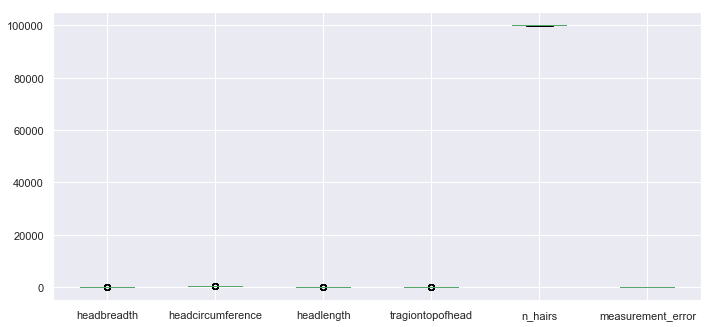

headbreadth  headcircumference  headlength  tragiontopofhead  \
0          150                583         206               140   
1          146                568         201               120   
2          148                573         202               125   
3          158                576         199               127   
4          153                566         197               122   

         n_hairs  measurement_error  
0  100032.785976                0.1  
1  100025.947031                0.1  
2   99967.122858                0.1  
3   99988.449377                0.1  
4   99965.535503                0.1

In [24]:
# Finding a good variance threshold

df = pd.concat([pd.read_csv(data_folder + "ANSUR_II_MALE.csv"), pd.read_csv(data_folder + "ANSUR_II_FEMALE.csv")], axis=0)
head_df = df[['headbreadth', 'headcircumference', 'headlength', 'tragiontopofhead']]
head_df['n_hairs'] = np.random.uniform(100000 - 72.19217799812031/2, 100000+72.19217799812031/2, df.shape[0]) # pus parecido
head_df['measurement_error'] = 0.1

#############################################################

# Create the boxplot
head_df.boxplot()

plt.subplots_adjust(left=0, bottom=0, right=1.5, top=1, wspace=0, hspace=0)
plt.show()

# 
head_df.head()

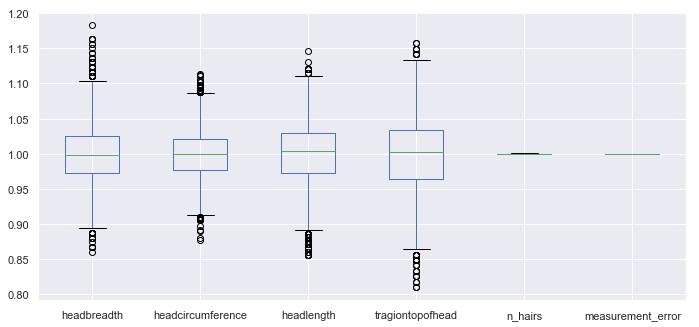

Variances of the normalized data: 
headbreadth          1.678952e-03
headcircumference    1.029623e-03
headlength           1.867872e-03
tragiontopofhead     2.639840e-03
n_hairs              4.349432e-08
measurement_error    3.231707e-27
dtype: float64

Inspect the printed variances. If you want to remove the 2 very low variance features, what would be a good 
variance threshold?
 Answer: 1.0e-03 (elimina 'n_hairs' & 'measurement_error')


In [25]:
# Normalize the data by dividing the dataframe with its mean values.
normalized_df = head_df / head_df.mean()

# new boxplot
normalized_df.boxplot()
plt.subplots_adjust(left=0, bottom=0, right=1.5, top=1, wspace=0, hspace=0)
plt.show()

# Print the variances of the normalized data
print("Variances of the normalized data: \n{}".format(normalized_df.var()))


print("""\nInspect the printed variances. If you want to remove the 2 very low variance features, what would be a good 
variance threshold?\n Answer: 1.0e-03 (elimina 'n_hairs' & 'measurement_error')""")

# 1.5e-03
# 1.5e-02
# 1.0e-03
# 1.0e-02

Exercício 7

In [26]:
# Features with low variance

from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.001)

# Fit the selector to normalized head_df
sel.fit(normalized_df)

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
reduced_df = head_df.loc[:, mask]

print("Dimensionality reduced from {} to {}.".format(head_df.shape[1], reduced_df.shape[1]))


Dimensionality reduced from 6 to 4.


Exercício 8

In [27]:
# Removing features with many missing values

school_df = pd.read_csv(data_folder + "Public_Schools2.csv")

# Calculate the missing value ratio per feature and then create a mask to remove features with many missing values.

# In what range lies highest ratio of missing values for a single feature in the dataset?
school_df.isna().sum() / len(school_df)

# Answer: Between 0.9 and 1

x             0.000000
y             0.000000
objectid_1    0.000000
objectid      0.000000
bldg_id       0.000000
bldg_name     0.000000
address       0.000000
city          0.000000
zipcode       0.000000
csp_sch_id    0.000000
sch_id        0.000000
sch_name      0.000000
sch_label     0.000000
sch_type      0.000000
shared        0.877863
complex       0.984733
label         0.000000
tlt           0.000000
pl            0.000000
point_x       0.000000
point_y       0.000000
dtype: float64

In [28]:
# Create a boolean mask on whether each feature less than 50% missing values.
mask = school_df.isna().sum() / len(school_df) < 0.5

# Create a reduced dataset by applying the mask
reduced_df = school_df.loc[:, mask]

print(school_df.shape)
print(reduced_df.shape)
print("shared e complex saíram")

(131, 21)
(131, 19)
shared e complex saíram


#### Exercício 9 - Pairwise correlation

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


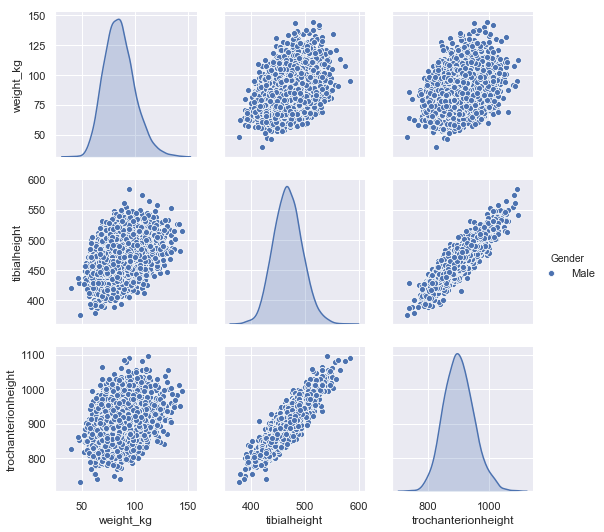

Correlation matrix:
                     weight_kg  tibialheight  trochanterionheight
weight_kg             1.000000      0.392135             0.348124
tibialheight          0.392135      1.000000             0.902884
trochanterionheight   0.348124      0.902884             1.000000

Visualizing the correlation matrix (heatmap):


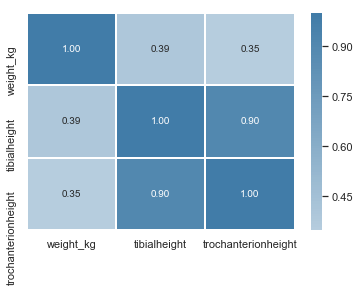


Visualizing the correlation matrix: (using mask)


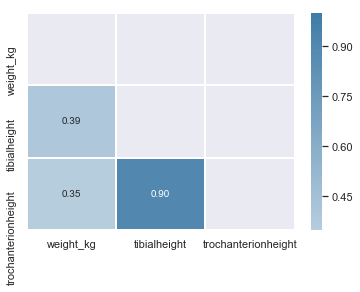

In [29]:
#vídeo

weights_df = ansur_df_male[['weight_kg', 'Gender', 'tibialheight', 'trochanterionheight']]

# Pairwise correlation (troquei algumas variáveis)
sns.pairplot(weights_df, hue="Gender")
plt.show()

# Correlation coefficients
print("Correlation matrix:")
print(weights_df.corr())

########################################################

# Visualizing the correlation matrix
print("\nVisualizing the correlation matrix (heatmap):")

cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)

sns.heatmap(weights_df.corr(), center=0, cmap=cmap, linewidths=1, annot=True, fmt=".2f")
plt.show()

# Visualizing the correlation matrix
print("\nVisualizing the correlation matrix: (using mask)")

corr = weights_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(weights_df.corr(), mask=mask, center=0, cmap=cmap, linewidths=1, annot=True, fmt=".2f")
plt.show()


Exercício 10

In [30]:
# Correlation intuition

# What statement on correlations is correct?

# Answer: The correlation coefficient of A to B is equal to that of B to A

Exercício 11

In [31]:
# Inspecting the correlation matrix

# What is the correlation coefficient between wrist and ankle circumference? (não tinha a amostra deles)

# Answer: ansur_df[['Ankle circumference', 'Wrist circumference']].corr() = 0.702178

Exercício 12

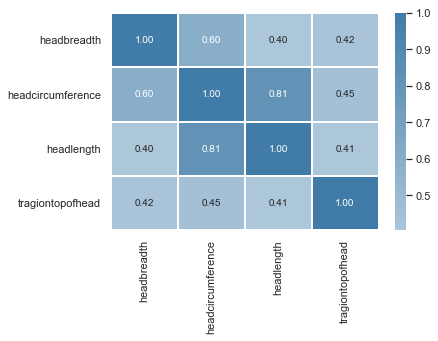

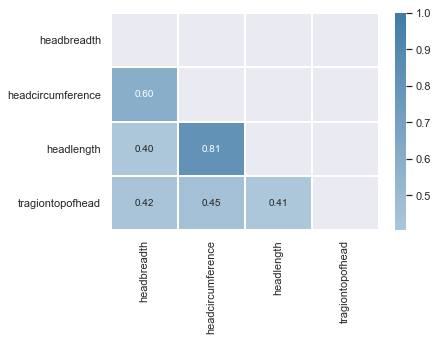

Which two features have the strongest correlation? 
Answer: headcircumference and headlength


In [32]:
# Visualizing the correlation matrix

# Create the correlation matrix  ---> vou utilizar outra amostra
corr = head_df.drop(['n_hairs', 'measurement_error'], axis=1).corr()

# Draw the heatmap
sns.heatmap(corr, cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

# Question
print("Which two features have the strongest correlation? \nAnswer: headcircumference and headlength")


#### Exercício 13 - Removing highly correlated features

                     suprasternaleheight  cervicaleheight  chestheight
suprasternaleheight                  NaN              NaN          NaN
cervicaleheight                 0.989308              NaN          NaN
chestheight                     0.968019         0.968008          NaN

Features to drop (where corr > 0.95): ['suprasternaleheight', 'cervicaleheight']

this was a brute force approach and should only be applied if we have a good understanding of the dataset.
If unsure, we an use feature extraction techniques. These remove correlations for me --> final chapter

Correlation caveats


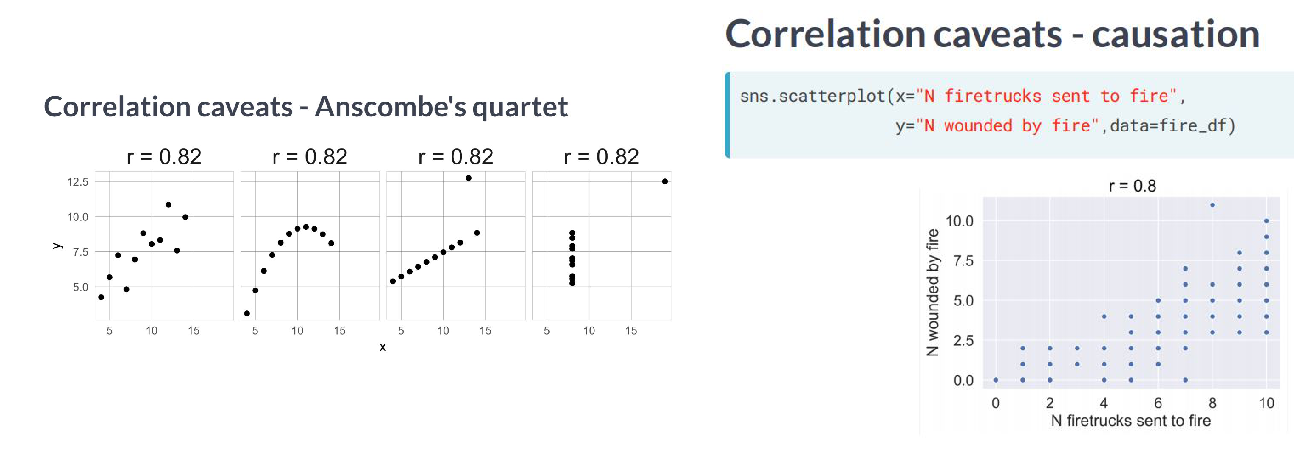

In [33]:
#vídeo

chest_df = df[['suprasternaleheight', 'cervicaleheight', 'chestheight']]

# Highly correlated data

# Highly correlated features

# ---> Removing highly correlated features

# Create positive correlation matrix
corr_df = chest_df.corr().abs()

# Create and apply mask
mask = np.triu(np.ones_like(corr_df, dtype=bool))

tri_df = corr_df.mask(mask)
print(tri_df)

##############################################

# Find columns that meet treshold
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]
print("\nFeatures to drop (where corr > 0.95): {}".format(to_drop))

# Drop those columns
reduced_df = chest_df.drop(to_drop, axis=1)

##################################################################################
print("=========================================================================================================\n")

# Feature selection vs Feature extraction
print("this was a brute force approach and should only be applied if we have a good understanding of the dataset.")
print("If unsure, we an use feature extraction techniques. These remove correlations for me --> final chapter")

print("==========================================================================================================\n")

# Correlation caveats - Anscombe's quartet
print("Correlation caveats")
plt.subplot(1, 2, 1)
image = plt.imread(data_folder + "correlation_caveats_anscombe_quartet.jpg")
plt.axis('off')
plt.imshow(image)

# Correlation caveats - causation
plt.subplot(1, 2, 2)
image = plt.imread(data_folder + "correlation_caveats_causation.jpg")
plt.axis('off')
plt.imshow(image)

plt.subplots_adjust(left=0, bottom=-0.5, right=3, top=1, wspace=0, hspace=0)
plt.show()



Exercício 14

In [34]:
# Filtering out highly correlated features

ansur_df_male = pd.read_csv(data_folder + "ANSUR_II_MALE.csv")

# Calculate the correlation matrix and take the absolute value
corr_matrix = ansur_df_male.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.95)]

# Drop the features in the to_drop list
reduced_df = ansur_df_male.drop(to_drop, axis=1)

print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))


The reduced dataframe has 88 columns.


Exercício 15

   pool_drownings  nuclear_energy
0             421           728.3
1             465           753.9
2             494           768.8
3             538           780.1
4             430           763.7


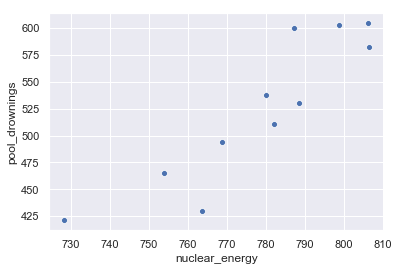

                pool_drownings  nuclear_energy
pool_drownings        1.000000        0.901179
nuclear_energy        0.901179        1.000000


In [35]:
# Nuclear energy and pool drownings

# The dataset 'weird_df' contains actual data provided by the US Centers for Disease Control & Prevention and Department
# of Energy. Let's see if we can find a pattern.

weird_df = pd.DataFrame({'pool_drownings': [421, 465, 494, 538, 430, 530, 511, 600, 582, 605, 603],
                        'nuclear_energy': [728.3, 753.9, 768.8, 780.1, 763.7, 788.5, 782.0, 787.2, 806.4, 806.2, 798.9]})

# Print the first five lines of weird_df
print(weird_df.head())

# Put nuclear energy production on the x-axis and the number of pool drownings on the y-axis
sns.scatterplot(x='nuclear_energy', y='pool_drownings', data=weird_df)
plt.show()

# Print out the correlation matrix of weird_df
print(weird_df.corr())

# Question
# What can you conclude from the strong correlation (r=0.9) between these features?

# Answer: correlation does not imply causation.

# Chapter 3 - Feature selection II, selecting for model accuracy

In [36]:
SEED = 1

#### Exercício 1 - Selecting features for model performance

In [37]:
#vídeo

# Ansur dataset sample
df = pd.concat([pd.read_csv(data_folder + "ANSUR_II_MALE.csv"), pd.read_csv(data_folder + "ANSUR_II_FEMALE.csv")], axis=0)
df_sample = df[['Gender', 'chestdepth', 'handlength', 'neckcircumference', 'shoulderlength', 'earlength']]

# Pre-processing the data
from sklearn.model_selection import train_test_split

y = df_sample['Gender']
X = df_sample.drop('Gender', axis=1)
X = X.astype(float)    #vou só converter para float para depois n aparecerem os avisos ao normalizar (q passou int p float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

# Creating a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='lbfgs', random_state=SEED)

lr.fit(X_train_std, y_train)

X_test_std = scaler.transform(X_test)

y_pred = lr.predict(X_test_std)

print("Score:", accuracy_score(y_test, y_pred))

##################################################################

# Inspecting the feature coefficients

print("feature coefficients: {}\n".format(lr.coef_))

print(dict(zip(X.columns, abs(lr.coef_[0]))), "\n")

# Features that contribute little to a model
X.drop('handlength' , axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

lr.fit(scaler.fit_transform(X_train), y_train)

print("Removing 'handlength', we get a new score of {}".format(
    accuracy_score(y_test, lr.predict(scaler.transform(X_test)))))

###############################################################
print("\n=========================================================================================\n")
print("RFE: (can be used with any model that produces features coefficients or features importances) \n")

# again
y = df_sample['Gender']
X = df_sample.drop('Gender', axis=1)
X = X.astype(float) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


# Recursive Feature Elimination
from sklearn.feature_selection import RFE 

rfe = RFE(estimator=LogisticRegression(solver='lbfgs', random_state=SEED), n_features_to_select=2, verbose=1)

# ---> n_features_to_select : int or None (default=None). If None, half of the features are selected.

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

rfe.fit(X_train_std, y_train)  # fits the model and then drop the feature with the smallest coefficient.

#####################################

# Inspecting the RFE results

print("\nRFE with 'n_features_to_select'=2: {}".format(X.columns[rfe.support_]), "\n")

# ---> Dropping a feature will affect other feature's coefficients
print("""é mais seguro usar o RFE assim definido com 2 do que fazer fit uma vez com o modelo e escolher os 2 mais altos,
uma vez que ao retirar variáveis os coeficientes vão-se alterando.\n""")

print(dict(zip(X.columns, rfe.ranking_)))

print("\n New score using RFE: {}".format(accuracy_score(y_test, rfe.predict(X_test_std))))



Score: 0.985722130697419
feature coefficients: [[-2.97558211  0.0233719   7.69896099  1.23053543  0.88847774]]

{'chestdepth': 2.97558210764477, 'handlength': 0.023371896073551262, 'neckcircumference': 7.698960991853577, 'shoulderlength': 1.2305354333968148, 'earlength': 0.8884777442259087} 

Removing 'handlength', we get a new score of 0.985722130697419


RFE: (can be used with any model that produces features coefficients or features importances) 

Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.

RFE with 'n_features_to_select'=2: Index(['chestdepth', 'neckcircumference'], dtype='object') 

é mais seguro usar o RFE assim definido com 2 do que fazer fit uma vez com o modelo e escolher os 2 mais altos,
uma vez que ao retirar variáveis os coeficientes vão-se alterando.

{'chestdepth': 1, 'handlength': 4, 'neckcircumference': 1, 'shoulderlength': 2, 'earlength': 3}

 New score using RFE: 0.9813289401427787


Exercício 2

In [38]:
# Building a diabetes classifier

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Pima Indians diabetes dataset to predict whether a person has diabetes using logistic regression.
pima = pd.read_csv(data_folder + "PimaIndians.csv")

y = pima['test']
X = pima.drop('test', axis=1)
X = X.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

scaler = StandardScaler()
lr = LogisticRegression(solver='lbfgs', random_state=SEED)

##########################################################

# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Fit the logistic regression model on the scaled training data
lr.fit(X_train_std, y_train)

# Scale the test features
X_test_std = scaler.transform(X_test)

# Predict diabetes presence on the scaled test set
y_pred = lr.predict(X_test_std)

# Prints accuracy metrics and feature coefficients
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred)), "\n") 

print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))


75.4% accuracy on test set. 

{'pregnant': 0.02, 'glucose': 1.26, 'diastolic': 0.03, 'triceps': 0.12, 'insulin': 0.16, 'bmi': 0.65, 'family': 0.15, 'age': 0.6}


Exercício 3

In [39]:
# Manual Recursive Feature Elimination

# Remove the feature with the lowest model coefficient
X = pima[['pregnant', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'family', 'age']]

X = pima[['pregnant', 'glucose', 'triceps', 'insulin', 'bmi', 'family', 'age']]
X = X.astype(float)

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))


78.6% accuracy on test set.
{'pregnant': 0.03, 'glucose': 1.19, 'triceps': 0.09, 'insulin': 0.05, 'bmi': 0.59, 'family': 0.24, 'age': 0.47}


In [40]:
# Remove the 2 features with the lowest model coefficients
X = pima[['pregnant', 'glucose', 'triceps', 'insulin', 'bmi', 'family', 'age']]

X = pima[['glucose', 'triceps', 'bmi', 'family', 'age']]
X = X.astype(float)

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

78.6% accuracy on test set.
{'glucose': 1.16, 'triceps': 0.09, 'bmi': 0.58, 'family': 0.24, 'age': 0.49}


In [41]:
# Only keep the feature with the highest coefficient
X = pima[['glucose', 'triceps', 'bmi', 'family', 'age']]

X = pima[['glucose']]
X = X.astype(float)

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

# Scales features and fits the logistic regression model to the data
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

74.5% accuracy on test set.
{'glucose': 1.36}


Exercício 4

In [42]:
# Automatic Recursive Feature Elimination

pima = pd.read_csv(data_folder + "PimaIndians.csv")

y = pima['test']
X = pima.drop('test', axis=1)
X = X.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

#######################################################################

# Create the RFE with a LogisticRegression estimator and 3 features to select
rfe = RFE(estimator=LogisticRegression(solver='lbfgs'), n_features_to_select=3, verbose=1)

# Fits the eliminator to the data
rfe.fit(X_train_std, y_train)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(X.columns, rfe.ranking_)))

# Print the features that are not eliminated
print(X.columns[rfe.support_])

# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(X_test_std))
print("{0:.1%} accuracy on test set.".format(acc)) 


Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
{'pregnant': 6, 'glucose': 1, 'diastolic': 5, 'triceps': 4, 'insulin': 3, 'bmi': 1, 'family': 2, 'age': 1}
Index(['glucose', 'bmi', 'age'], dtype='object')
72.9% accuracy on test set.


#### Exercício 5 - Tree-based feature selection

RandomForestClassifier performs feature selection by design, to avoid overfitting.

X columns: Index(['pregnant', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'family', 'age'],
      dtype='object') 

Score: 0.7711864406779662


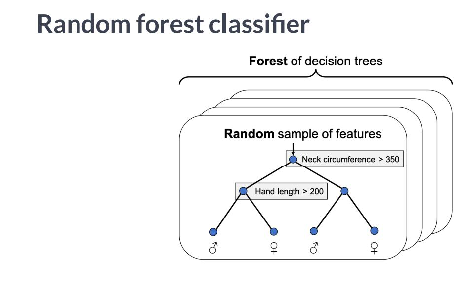

Feature importances:
 [0.10534193 0.2374455  0.07163816 0.10042533 0.12964987 0.12858349
 0.09634425 0.13057147]
Sum: 1.0

mask (feature_importances_ > 0.1): [ True  True False  True  True  True False  True] 

X_reduced: Index(['pregnant', 'glucose', 'triceps', 'insulin', 'bmi', 'age'], dtype='object')


RFE with random forests: (deve-se reduzir uma a uma e não escolher as melhores de uma vez!)

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Index(['glucose', 'insulin', 'age'], dtype='object')
Score: 0.7457627118644068

with steps: (to speed the process. Aqui defini como sendo igual a 2, o q significa q vai tirando de 2 em 2)
Fitting estimator with 8 features.
Fitting estimator with 6 features.
Fitting estimator with 4 features.
Index(['glucose', 'bmi', 'age'], dtype='object')
Score: 0.7627118644067796


In [43]:
#vídeo

# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

print("RandomForestClassifier performs feature selection by design, to avoid overfitting.\n")

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
print("X columns:", X.columns, "\n")
print("Score:", accuracy_score(y_test, rf.predict(X_test)))

image = plt.imread(data_folder + "random_forests.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

# Feature importance values
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
print("Feature importances:\n", rf.feature_importances_)

print("Sum:", sum(rf.feature_importances_))


# Feature importance as a feature selector
mask = rf.feature_importances_ > 0.1
print("\nmask (feature_importances_ > 0.1):", mask, "\n")

X_reduced = X.loc[:, mask]

print("X_reduced:", X_reduced.columns)

#############################
print("\n=====================================================\n")
print("RFE with random forests: (deve-se reduzir uma a uma e não escolher as melhores de uma vez!)\n")

# RFE with random forests
from sklearn.feature_selection import RFE

rfe = RFE(estimator=RandomForestClassifier(n_estimators=100), n_features_to_select=3, verbose=1)

rfe.fit(X_train,y_train)
print(X.columns[rfe.support_])
print("Score:", accuracy_score(y_test, rfe.predict(X_test)))

# with steps
print("\nwith steps: (to speed the process. Aqui defini como sendo igual a 2, o q significa q vai tirando de 2 em 2)")

rfe = RFE(estimator=RandomForestClassifier(n_estimators=100), n_features_to_select=3, step=2, verbose=1)
rfe.fit(X_train,y_train)

print(X.columns[rfe.support_])
print("Score:", accuracy_score(y_test, rfe.predict(X_test)))


Exercício 6

In [44]:
# Building a random forest model

pima = pd.read_csv(data_folder + "PimaIndians.csv")

y = pima['test']
X = pima.drop('test', axis=1)
X = X.astype(float)

# Perform a 75% training and 25% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Fit the random forest model to the training data
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# Calculate the accuracy
acc = accuracy_score(y_test, rf.predict(X_test))

# Print the importances per feature
print(dict(zip(X.columns, rf.feature_importances_.round(2))))

# Print accuracy
print("\n{0:.1%} accuracy on test set.".format(acc))


{'pregnant': 0.07, 'glucose': 0.25, 'diastolic': 0.09, 'triceps': 0.09, 'insulin': 0.14, 'bmi': 0.12, 'family': 0.12, 'age': 0.13}

79.6% accuracy on test set.


Exercício 7

In [45]:
# Random forest for feature selection

# Create a mask for features importances above the threshold (>  0.15)
mask = rf.feature_importances_ > 0.15

# Prints out the mask
print(mask)

# Apply the mask to the feature dataset X
reduced_X = X.loc[:, mask]

# prints out the selected column names
print("\n", reduced_X.columns)


[False  True False False False False False False]

 Index(['glucose'], dtype='object')


Exercício 8

In [46]:
# Recursive Feature Elimination with random forests

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

pima = pd.read_csv(data_folder + "PimaIndians.csv")

y = pima['test']
X = pima.drop('test', axis=1)
X = X.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#######################################

# Wrap the feature eliminator around the random forest model, that selects the 2 most important features
rfe = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=0), n_features_to_select=2, verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y_train)

# Create a mask
mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, mask]
print("\nReduced X (using rfe.support_):", reduced_X.columns)

print("\n============================================================================\n")
print("Now using 2 steps:\n")

# Set the feature eliminator to remove 2 features on each step
rfe = RFE(estimator=RandomForestClassifier(n_estimators=100,random_state=0), n_features_to_select=2, step=2, verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y_train)

# Create a mask
mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, mask]
print("\nReduced X (using rfe.support_):", reduced_X.columns)

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.

Reduced X (using rfe.support_): Index(['glucose', 'insulin'], dtype='object')


Now using 2 steps:

Fitting estimator with 8 features.
Fitting estimator with 6 features.
Fitting estimator with 4 features.

Reduced X (using rfe.support_): Index(['glucose', 'insulin'], dtype='object')


#### Exercício 9 - Regularized linear regression

In [47]:
%%script false
#vídeo

# Linear model concept

# Creating our own dataset

# Linear regression in Python
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

# Actual coefficients = [5 2 0]
print(lr.coef_)

# Actual intercept = 20
print(lr.intercept_)

# Calculates R-squared
print(lr.score(X_test, y_test))

# Loss function: Mean Squared Error

###########################################################

# Adding regularization ....

# Lasso regressor
from sklearn.linear_model import Lasso

la = Lasso()

la.fit(X_train, y_train)

# Actual coefficients = [5 2 0]
print(la.coef_)
print(la.score(X_test, y_test))

la = Lasso(alpha=0.05)              # -----> set alpha

la.fit(X_train, y_train)

# Actual coefficients = [5 2 0]
print(la.coef_)

print(la.score(X_test, y_test))  # 0.974

Couldn't find program: 'false'


Exercício 10

In [48]:
# Creating a LASSO regressor

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

non_numeric = ['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch']

ansur_df_male = pd.read_csv(data_folder + "ANSUR_II_MALE.csv").drop(non_numeric, axis=1)

y = ansur_df_male['BMI']
X = ansur_df_male.drop('BMI', axis=1)
X = X.astype(float)

scaler = StandardScaler()

# Set the test size to 30% to get a 70-30% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Create the Lasso model
la = Lasso()

# Fit it to the standardized training data
la.fit(X_train_std, y_train)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Exercício 11

In [49]:
# Lasso model results

# Scale the test set
X_test_std = scaler.transform(X_test)

# Calculate the coefficient of determination (R squared) on the scaled test set
r_squared = la.score(X_test_std, y_test)
print("The model can predict {0:.1%} of the variance in the test set (r squared).".format(r_squared))

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Take the sum of this list
n_ignored = zero_coef.sum()
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))


The model can predict 84.7% of the variance in the test set (r squared).
The model has ignored 84 out of 93 features.


Exercício 12

In [50]:
# Adjusting the regularization strength (tweaking alpha)

# Your current Lasso model has an R2 score of 84.7%. When a model applies overly powerful regularization it can suffer from
# high bias, hurting its predictive power.

# Let's see if we can improve the predictive power by tweaking the regularization strength with the alpha parameter.

alphas = np.arange(0.01, 1, 0.1)
scores = []

# Find the right alpha value
for i in alphas:
    la = Lasso(alpha=i, random_state=0)
    la.fit(X_train_std, y_train)
    r_squared = la.score(X_test_std, y_test)
    scores.append(r_squared)

best_alpha = alphas[np.argmax(scores)]

la = Lasso(alpha=best_alpha, random_state=0)
la.fit(X_train_std, y_train)
r_squared = la.score(X_test_std, y_test)

# Fits the model and calculates performance stats
r_squared = la.score(X_test_std, y_test)
n_ignored_features = sum(la.coef_ == 0)

# Print peformance stats 
print("Best alpha: {}".format(best_alpha))
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))
print("{} out of {} features were ignored.".format(n_ignored_features, len(la.coef_)))


Best alpha: 0.01
The model can predict 99.5% of the variance in the test set.
53 out of 93 features were ignored.


#### Exercício 13 - Combining feature selectors

In [51]:
%%script false
#vídeo

# Lasso regressor
from sklearn.linear_model import Lasso

la = Lasso(alpha=0.05)
la.fit(X_train, y_train)

# Actual coefficients = [5 2 0]
print(la.coef_)
print(la.score(X_test, y_test))

################################################

# LassoCV regressor
lcv = LassoCV()

lcv.fit(X_train, y_train)

print(lcv.alpha_)

mask = lcv.coef_ != 0

print(mask)

reduced_X = X.loc[:, mask]

##################################################

# Taking a step back
#  - Random forest is combination of decision trees.
#  - We can use combination of models for feature selection too


# 1) Feature selection with LassoCV
from sklearn.linear_model import LassoCV

lcv = LassoCV()

lcv.fit(X_train, y_train)
lcv.score(X_test, y_test)

lcv_mask = lcv.coef_ != 0
sum(lcv_mask)  # 66


# 2) Feature selection with random forest
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

rfe_rf = RFE(estimator=RandomForestRegressor(), n_features_to_select=66, step=5, verbose=1) # same number of features
rfe_rf.fit(X_train, y_train)
rf_mask = rfe_rf.support_


# 3) Feature selection with gradient boosting
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

rfe_gb = RFE(estimator=GradientBoostingRegressor(), n_features_to_select=66, step=5, verbose=1)
rfe_gb.fit(X_train, y_train)
gb_mask = rfe_gb.support_

######################################

# Combining the feature selectors

import numpy as np

votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)

print(votes)

mask = model_votes >= 2

reduced_X = X.loc[:, mask]


Couldn't find program: 'false'


Exercício 14

In [52]:
# Creating a LassoCV regressor

# You'll be predicting biceps circumference on a subsample of the male ANSUR dataset using the LassoCV() regressor that 
# automatically tunes the regularization strength (alpha value) using Cross-Validation.

#######################################################################

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

non_numeric = ['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch']

ansur_df_male_sample = pd.read_csv(data_folder + "ANSUR_II_MALE.csv").drop(non_numeric, axis=1)[:1000]

y = ansur_df_male_sample['bicepscircumferenceflexed']
X = ansur_df_male_sample.drop('bicepscircumferenceflexed', axis=1)
X = X.astype(float)

scaler = StandardScaler()

# Set the test size to 30% to get a 70-30% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# scale
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###########################################################################

In [53]:
from sklearn.linear_model import LassoCV

# Create and fit the LassoCV model on the training set
lcv = LassoCV(cv=5)
lcv.fit(X_train, y_train)
print('Optimal alpha = {0:.3f}'.format(lcv.alpha_))

# Calculate R squared on the test set
r_squared = lcv.score(X_test, y_test)
print('\nThe model explains {0:.1%} of the test set variance'.format(r_squared))

# Create a mask for coefficients not equal to zero
lcv_mask = lcv.coef_ != 0
print('\n{} features out of {} selected'.format(sum(lcv_mask), len(lcv_mask)))

Optimal alpha = 0.135

The model explains 89.1% of the test set variance

52 features out of 93 selected


Exercício 15

In [54]:
# 2 Ensemble models for extra votes (GradientBoostingRegressor and RandomForestRegressor)

# Let's use 2 more models to select the 10 features they consider most important using the Recursive Feature Eliminator(RFE)

from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

# 1) Select 10 features with RFE on a GradientBoostingRegressor, drop 6 features on each step
rfe_gb = RFE(estimator=GradientBoostingRegressor(), n_features_to_select=10, step=6, verbose=1)

# fit to the training data
rfe_gb.fit(X_train, y_train)


# 2) Calculate the R squared on the test set
r_squared = rfe_gb.score(X_test, y_test)

print('\nThe GradientBoostingRegressor model can explain {0:.1%} of the variance in the test set.'.format(r_squared))

# 3) Assign the support array to gb_mask
gb_mask = rfe_gb.support_

Fitting estimator with 93 features.
Fitting estimator with 87 features.
Fitting estimator with 81 features.
Fitting estimator with 75 features.
Fitting estimator with 69 features.
Fitting estimator with 63 features.
Fitting estimator with 57 features.
Fitting estimator with 51 features.
Fitting estimator with 45 features.
Fitting estimator with 39 features.
Fitting estimator with 33 features.
Fitting estimator with 27 features.
Fitting estimator with 21 features.
Fitting estimator with 15 features.

The GradientBoostingRegressor model can explain 85.2% of the variance in the test set.


In [55]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Select 10 features with RFE on a RandomForestRegressor, drop 6 features on each step
rfe_rf = RFE(estimator=RandomForestRegressor(n_estimators=100), n_features_to_select=10, step=6, verbose=1)
rfe_rf.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_rf.score(X_test, y_test)
print('The RandomForestRegressor model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
rf_mask = rfe_rf.support_

Fitting estimator with 93 features.
Fitting estimator with 87 features.
Fitting estimator with 81 features.
Fitting estimator with 75 features.
Fitting estimator with 69 features.
Fitting estimator with 63 features.
Fitting estimator with 57 features.
Fitting estimator with 51 features.
Fitting estimator with 45 features.
Fitting estimator with 39 features.
Fitting estimator with 33 features.
Fitting estimator with 27 features.
Fitting estimator with 21 features.
Fitting estimator with 15 features.
The RandomForestRegressor model can explain 84.2% of the variance in the test set


Exercício 16

In [56]:
# Combining 3 feature selectors

from sklearn.linear_model import LinearRegression

# The per model votes have been pre-loaded as lcv_mask, rf_mask, and gb_mask

# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)
print("Votes:", votes, "\n")

# Create a mask for features selected by all 3 models
meta_mask = votes >= 3

print("created meta-mask, where it selects features\n")

# Apply the dimensionality reduction on X
X_reduced = X.loc[:, meta_mask]

print("Reduced columns:\n {}".format(X_reduced.columns), "\n")

###############################

# Plug the reduced dataset into a linear regression pipeline
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lm = LinearRegression()

lm.fit(X_train, y_train)

r_squared = lm.score(X_test, y_test)

print('Applying simple LinearRegression, the model can explain {0:.1%} of the variance in the test set using {1:} features.'
      .format(r_squared, len(lm.coef_)))


Votes: [1 0 0 1 0 0 1 1 0 1 1 1 1 1 3 1 0 1 0 1 0 1 2 3 0 1 3 1 1 1 1 1 0 0 0 0 3
 3 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 3 1 0 0 0 0 0 0
 0 3 1 1 1 1 0 0 1 0 1 1 1 0 1 0 3 0 3] 

created meta-mask, where it selects features

Reduced columns:
 Index(['buttockcircumference', 'chestdepth', 'crotchlengthomphalion',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'shouldercircumference', 'thighcircumference', 'weight_kg', 'BMI'],
      dtype='object') 

Applying simple LinearRegression, the model can explain 87.2% of the variance in the test set using 9 features.


# Chapter 4 - Feature extraction

#### Exercício 1 - Feature extraction

In [57]:
%%script false
#vídeo

# Feature selection vs Feature extraction (agora vamos ver este)

# Feature generation - BMI
df_body['BMI'] = df_body['Weight kg'] / df_body['Height m'] ** 2
df_body.drop(['Weight kg', 'Height m'], axis=1)

# Feature generation - averages
leg_df['leg mm'] = leg_df[['right leg mm', 'left leg mm']].mean(axis=1)
leg_df.drop(['right leg mm', 'left leg mm'], axis=1)

Couldn't find program: 'false'


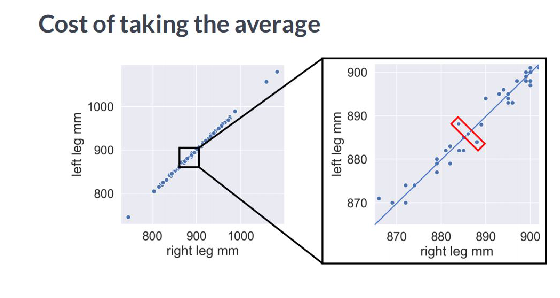

In [58]:
# Cost of taking the average
image = plt.imread(data_folder + "cost_average.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=-0.2, right=1.2, top=1, wspace=0, hspace=0)
plt.show()

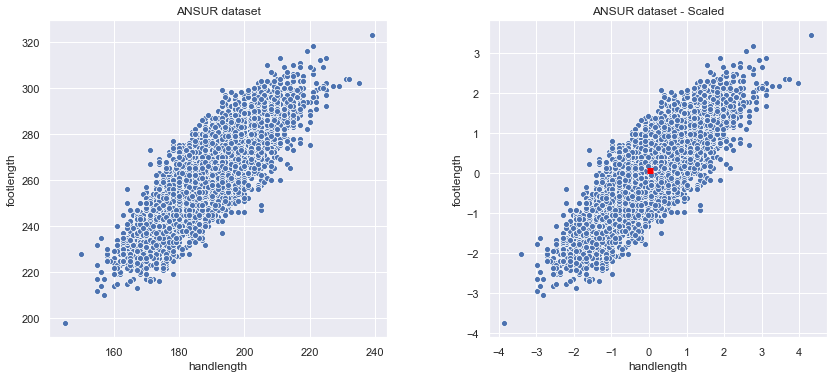

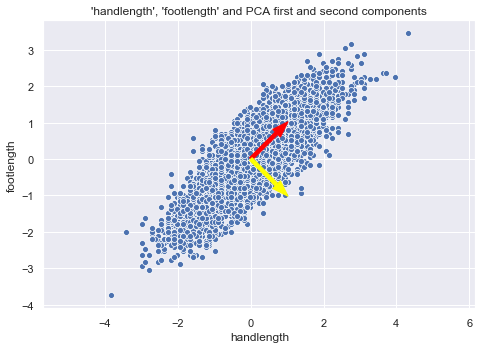

The red is the direction in which this part of the ANSUR data set varies the most (first component).


In [59]:
df = pd.concat([pd.read_csv(data_folder + "ANSUR_II_MALE.csv"), pd.read_csv(data_folder + "ANSUR_II_FEMALE.csv")], axis=0)
numeric_cols = ['BMI_class', 'Height_class', 'Component', 'Branch', 'Gender']
df_numeric = df.drop(numeric_cols, axis=1).astype(float)
###########################################################################

# Intro to PCA

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_numeric, x='handlength', y='footlength')
plt.title("ANSUR dataset")

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scale
df_std = pd.DataFrame(scaler.fit_transform(df_numeric), columns = df_numeric.columns)

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_std, x='handlength', y='footlength')
plt.title("ANSUR dataset - Scaled")
plt.text(-0.2, 0, '.', fontsize=60, color='red')
plt.subplots_adjust(left=0, bottom=-0.1, right=1.8, top=1, wspace=0.3, hspace=0)
plt.show()


##############################################################################################################

# meu - PCA
sns.scatterplot(data=df_std, x='handlength', y='footlength')

# Create a PCA instance: model
from sklearn.decomposition import PCA

model = PCA()

# Fit model to points
to_PCA = df_std[['handlength', 'footlength']]   # df_std is already scaled
model.fit(to_PCA)

# Get the mean of the sample: mean
mean = model.mean_

# Get the first and second principal components
first_pc = model.components_[0, :]
second_pc = model.components_[1, :]

# Plot first_pc and second_pc as arrows, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.1)
plt.arrow(mean[0], mean[1], second_pc[0], second_pc[1], color='yellow', width=0.1)

# Keep axes on same scale
plt.axis('equal')
plt.title("'handlength', 'footlength' and PCA first and second components")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

print("The red is the direction in which this part of the ANSUR data set varies the most (first component).")

Exercício 2

In [60]:
# Manual feature extraction I

sales_df = pd.read_csv(data_folder + "grocery_sales.csv")

print(sales_df.head())

# For the purpose of your analysis it's more interesting to know the average price per product.

# Calculate the price from the quantity sold and revenue
sales_df['price'] = sales_df['revenue'] / sales_df['quantity']

# Drop the quantity and revenue features
reduced_df = sales_df.drop(['quantity', 'revenue'], axis=1)

reduced_df.head()

  storeID  product  quantity  revenue
0       A   Apples      1811   9300.6
1       A  Bananas      1003   3375.2
2       A  Oranges      1604   8528.5
3       B   Apples      1785   9181.0
4       B  Bananas       944   3680.2


storeID  product     price
0       A   Apples  5.135616
1       A  Bananas  3.365105
2       A  Oranges  5.317020
3       B   Apples  5.143417
4       B  Bananas  3.898517

Exercício 3

In [61]:
# Manual feature extraction II

# You're working on a variant of the ANSUR dataset, height_df, where a person's height was measured 3 times. 
# Add a feature with the mean height to the dataset and then drop the 3 original features.

height_df = pd.DataFrame(data=df['weight_kg'][:100])
height_df['height_1'] = np.random.uniform(1.7538 - 0.07021, 1.7538 + 0.07021, height_df.shape[0])
height_df['height_2'] = np.random.uniform(1.7537 - 0.07, 1.7537 + 0.07, height_df.shape[0])
height_df['height_3'] = np.random.uniform(1.7545999 - 0.07021, 1.75459999 + 0.071187, height_df.shape[0])

print(height_df.head())

############################

# Calculate the mean height
height_df['height'] = height_df[['height_1', 'height_2', 'height_3']].mean(axis=1)

# Drop the 3 original height features
reduced_df = height_df.drop(['height_1', 'height_2', 'height_3'], axis=1)

reduced_df.head()

   weight_kg  height_1  height_2  height_3
0       81.5  1.780562  1.693794  1.823066
1       72.6  1.778743  1.765126  1.814149
2       92.9  1.745794  1.726854  1.725728
3       79.4  1.739629  1.766701  1.763434
4       94.6  1.762420  1.817153  1.743691


weight_kg    height
0       81.5  1.765807
1       72.6  1.786006
2       92.9  1.732792
3       79.4  1.756588
4       94.6  1.774422

Exercício 4

In [62]:
# Principal component intuition

# After standardizing the lower and upper arm lengths from the ANSUR dataset we've added two perpendicular vectors that are
# aligned with the main directions of variance. We can describe each point in the dataset as a combination of these two 
# vectors multiplied with a value each. These values are then called principal components.

# Which of the following statements is true?

# People with a negative component for the yellow vector have long forearms relative to their upper arms. (True)
# People with a positive component for the yellow vector have long forearms relative to their upper arms.
# People with a negative component for the red vector have above average arm lengths.
# People with a positive component for the red vector have below average arm lengths.


#### Exercício 5 - Principal component analysis

The point (2.1, 1) can be described as multiplications of vectors. In this case it will be 2 times the red
vector and -1 times the yellow vector. We call these values (2, -1) the first and second principal components, respectively.
The red one is the most important as it is aligned with the biggest source of variance in the data.
We can calculate the principal components for all points in the dataset with sklearn PCA. (scale the data before - it
computes variances while performing the PCA method)


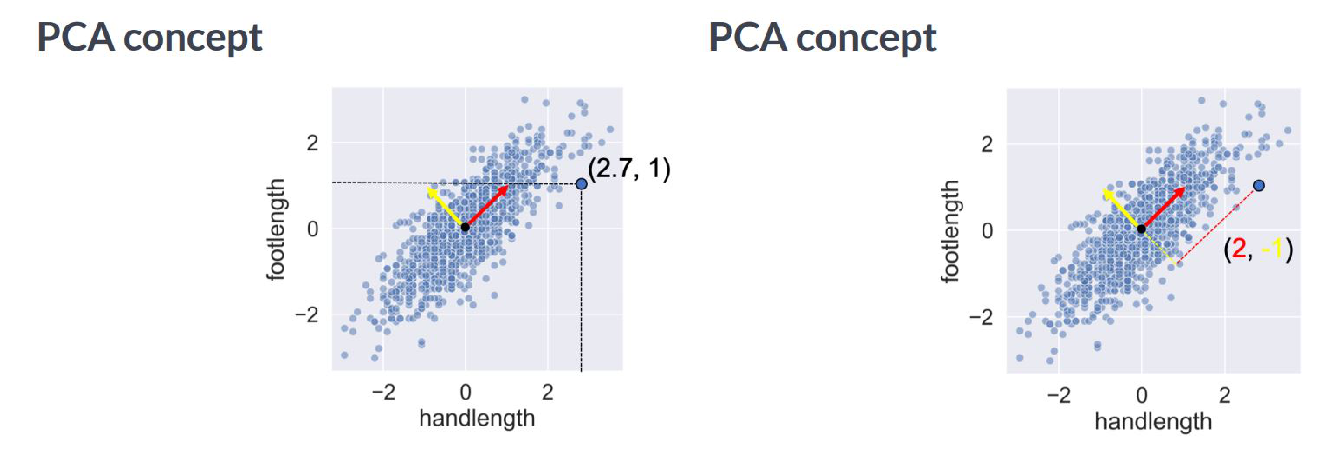

Calculating the principal components:
 [[ 0.63349335 -0.17702796]
 [ 0.34978902  0.3525231 ]
 [ 1.12612183  0.55957714]
 ...
 [-0.46533648  0.67595516]
 [-2.32250536  0.68927367]
 [-1.73242768  0.22211935]]

PCA removes correlation:


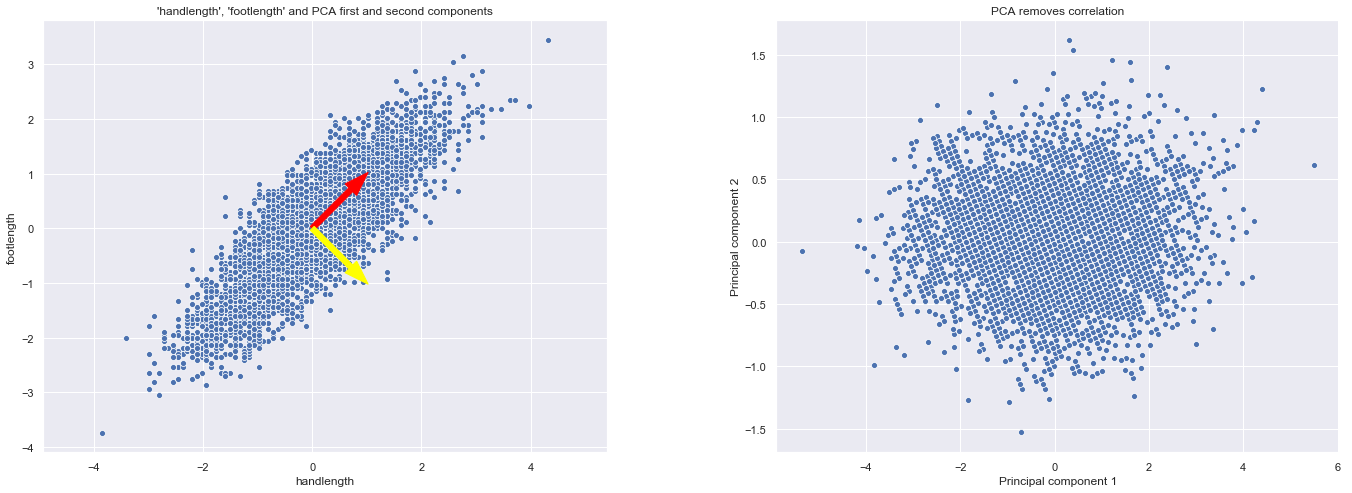

Principal component explained variance ratio:
 [0.92117138 0.07882862]


In [63]:
#vídeo

# PCA concept

print("""The point (2.1, 1) can be described as multiplications of vectors. In this case it will be 2 times the red
vector and -1 times the yellow vector. We call these values (2, -1) the first and second principal components, respectively.
The red one is the most important as it is aligned with the biggest source of variance in the data.
We can calculate the principal components for all points in the dataset with sklearn PCA. (scale the data before - it
computes variances while performing the PCA method)""")

plt.subplot(1, 2, 1)
image = plt.imread(data_folder + "pca_concept.jpg")
plt.axis('off')
plt.imshow(image)

plt.subplot(1, 2, 2)
image = plt.imread(data_folder + "pca_concept_2.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=-0.5, right=3, top=1, wspace=0, hspace=0)
plt.show()

####################################################################################################

df = pd.concat([pd.read_csv(data_folder + "ANSUR_II_MALE.csv"), pd.read_csv(data_folder + "ANSUR_II_FEMALE.csv")], axis=0)
numeric_cols = ['BMI_class', 'Height_class', 'Component', 'Branch', 'Gender']
df_numeric = df.drop(numeric_cols, axis=1).astype(float)

####################################################################################################

# Calculating the principal components
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_df = scaler.fit_transform(df_numeric)

from sklearn.decomposition import PCA
pca = PCA()  
to_PCA = df_std[['handlength', 'footlength']]   # ver atrás

# Principal components
print("Calculating the principal components:\n", pca.fit_transform(to_PCA))

###############################################################

# PCA removes correlation
print("\nPCA removes correlation:")

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_std, x='handlength', y='footlength')

mean = pca.mean_
first_pc = pca.components_[0, :]
second_pc = pca.components_[1, :]
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.1)
plt.arrow(mean[0], mean[1], second_pc[0], second_pc[1], color='yellow', width=0.1)
plt.axis('equal')
plt.title("'handlength', 'footlength' and PCA first and second components")

plt.subplot(1, 2, 2)
sns.scatterplot(pca.fit_transform(to_PCA)[:, 0], pca.fit_transform(to_PCA)[:, 1])
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.title("PCA removes correlation")

plt.subplots_adjust(left=0, bottom=-0.5, right=3, top=1, wspace=0.3, hspace=0)
plt.show()

#####################################################################

# Principal component explained variance ratio
from sklearn.decomposition import PCA

print("Principal component explained variance ratio:\n", pca.explained_variance_ratio_)

#####################################################################


PCA for dimensionality reduction:


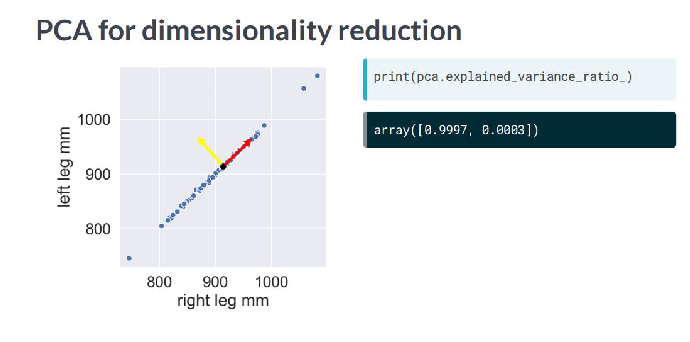

Regarding the complete ANSUR dataset:

Principal component explained variance ratio:
 [5.56363311e-01 1.30884134e-01 5.07999670e-02 3.15841769e-02
 2.10366372e-02 1.60557326e-02 1.36837911e-02 1.14965645e-02
 1.09549376e-02 9.79631899e-03 9.44852401e-03 8.72551080e-03
 6.71987242e-03 6.42825493e-03 6.39432700e-03 6.04392630e-03
 5.77611845e-03 5.68981048e-03 5.22906086e-03 4.81645074e-03
 4.40182008e-03 4.31344239e-03 4.12651012e-03 3.81708218e-03
 3.68569425e-03 3.33675568e-03 3.27646223e-03 2.85246914e-03
 2.83355001e-03 2.71736044e-03 2.53200136e-03 2.30390590e-03
 2.13355271e-03 2.04753262e-03 1.95629453e-03 1.93934442e-03
 1.86082547e-03 1.73854807e-03 1.63722727e-03 1.50201306e-03
 1.47031331e-03 1.41216297e-03 1.28840585e-03 1.27495046e-03
 1.19578587e-03 1.11417170e-03 1.07828908e-03 1.06858499e-03
 1.00999149e-03 9.71596079e-04 9.16195957e-04 8.71194367e-04
 8.37380124e-04 7.31829374e-04 6.88790562e-04 6.75821403e-04
 6.51372247e-04 6.24851691e-04 5.68612527e-04 5.29608035e-04

In [64]:
# PCA for dimensionality reduction

print("\nPCA for dimensionality reduction:")
image = plt.imread(data_folder + "pca_explained_variance_example1.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=-0.3, right=1.5, top=1, wspace=0.3, hspace=0)
plt.show()

std_df = scaler.fit_transform(df_numeric)
pca_df = PCA()  
pca_df.fit_transform(std_df)

print("Regarding the complete ANSUR dataset:\n")
print("Principal component explained variance ratio:\n", pca_df.explained_variance_ratio_)

print("\nCumulative sum: \n", pca_df.explained_variance_ratio_.cumsum())

Exercício 6

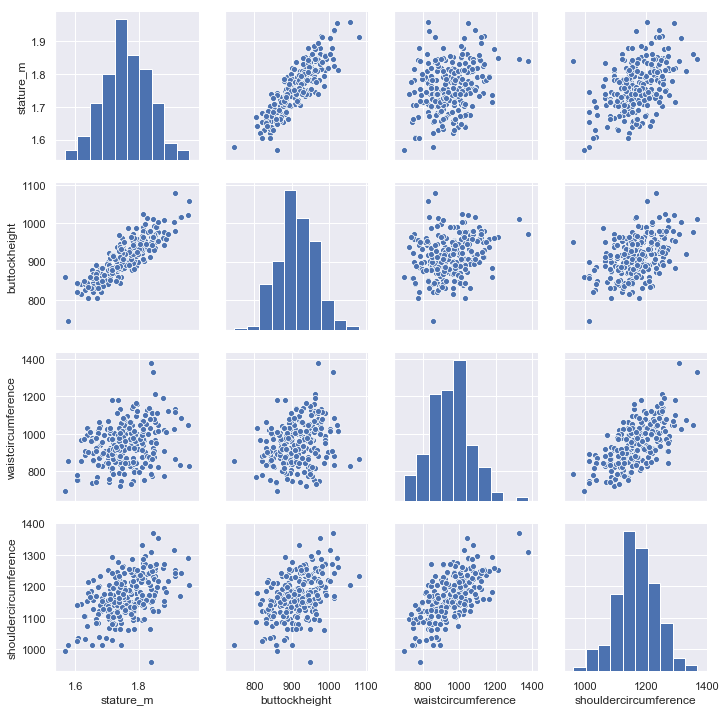

In [65]:
# Calculating Principal Components

# You'll visually inspect a 4 feature sample of the ANSUR dataset before and after PCA using Seaborn's pairplot(). 
# This will allow you to inspect the pairwise correlations between the features.

ansur_df = df[['stature_m', 'buttockheight', 'waistcircumference', 'shouldercircumference']][:250].astype(float)

# Create a pairplot to inspect ansur_df
sns.pairplot(ansur_df)
plt.show()

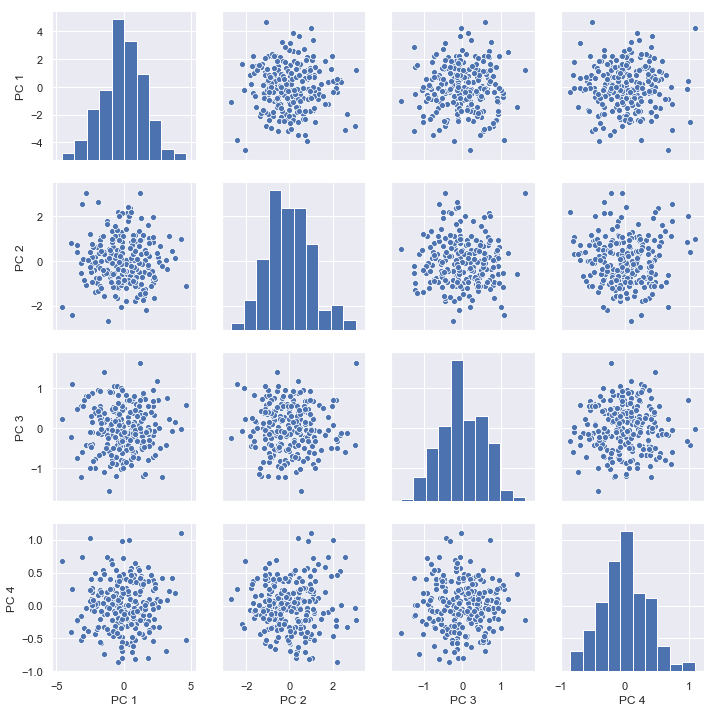

in contrast to the input features, none of the principal components are correlated to one another.


In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create the scaler and standardize the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(ansur_std)

# This changes the numpy array output back to a dataframe
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

# Create a pairplot of the principal component dataframe
sns.pairplot(pc_df)
plt.show()

print("in contrast to the input features, none of the principal components are correlated to one another.")

Exercício 7

In [67]:
# PCA on a larger dataset

# You'll now apply PCA on a somewhat larger ANSUR datasample with 13 dimensions, once again pre-loaded as ansur_df. 

ansur_df = df[['stature_m', 'buttockheight', 'waistdepth', 'span', 'waistcircumference', 'shouldercircumference',
               'footlength', 'handlength', 'functionalleglength', 'chestheight', 'chestcircumference',
               'cervicaleheight', 'sittingheight']][:250].astype(float)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# The fitted model will be used in the next exercise. Since we are not using the principal components themselves there is
# no need to transform the data, instead, it is sufficient to fit pca to the data.

# Apply PCA
pca = PCA()
pca.fit(ansur_std)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Exercício 8

In [68]:
# PCA explained variance

# Inspect the explained variance ratio per component
print("Explained variance ratio:\n {}\n".format(pca.explained_variance_ratio_))

# Question:  How much of the variance is explained by the 4th principal component?
print("The 4th principal component explains 3.77% of the variance\n")

# Print the cumulative sum of the explained variance ratio
print("Cumulative Explained Variance ratio:\n {}\n".format(pca.explained_variance_ratio_.cumsum()))

# Question:  What's the lowest number of principal components you should keep if you don't want to lose more than 10% of 
# explained variance during dimensionality reduction?
print("""In order to not lose more than 10% of the explained variance during dimensionality reduction we should keep at
least 4 principal components""")


Explained variance ratio:
 [0.61449404 0.19893965 0.06803095 0.03770499 0.03031502 0.0171759
 0.01072762 0.00656681 0.00634743 0.00436015 0.0026586  0.00202617
 0.00065268]

The 4th principal component explains 3.77% of the variance

Cumulative Explained Variance ratio:
 [0.61449404 0.81343368 0.88146463 0.91916962 0.94948464 0.96666054
 0.97738816 0.98395496 0.99030239 0.99466254 0.99732115 0.99934732
 1.        ]

In order to not lose more than 10% of the explained variance during dimensionality reduction we should keep at
least 4 principal components


#### Exercício 9 - PCA applications

When using PCA for dimensionality reduction, we decide how much of the explained variance we are willing to 
sacrifice. However, one downside of PCA is that the components may be hard to interpret. 

Left plot: looking at the components attributes. This tells us to what extent each components vector is affected by a 
particular feature. The feature with the biggest positive or negative effects on a component can then be used to add meaning
to that component. In the left plot example, the effects of the features of the first components are positive and equally 
strong at 0.71. The first component is affected as much as by hand length as by foot length. The second component is, 
however, negatively affected by handlength and positively by footlength, so people who score high for the second component 
have short hands, compared to their feet.

Right plot: the first component is mostly affected by the Height class. When using this categorical feature to color the 
plot, we see they pretty 

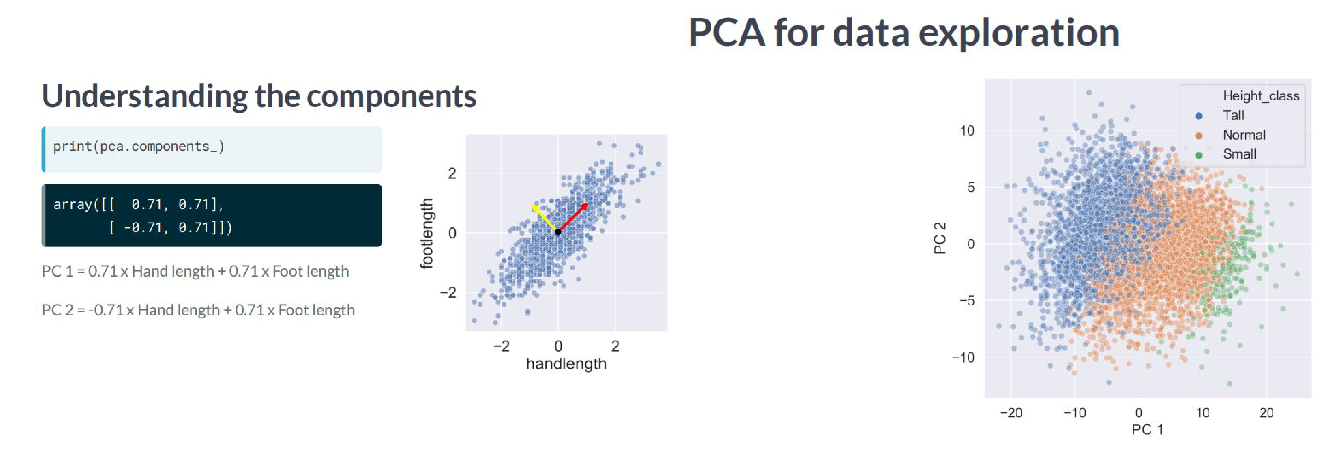

In [69]:
#vídeo

print("""When using PCA for dimensionality reduction, we decide how much of the explained variance we are willing to 
sacrifice. However, one downside of PCA is that the components may be hard to interpret. 

Left plot: looking at the components attributes. This tells us to what extent each components vector is affected by a 
particular feature. The feature with the biggest positive or negative effects on a component can then be used to add meaning
to that component. In the left plot example, the effects of the features of the first components are positive and equally 
strong at 0.71. The first component is affected as much as by hand length as by foot length. The second component is, 
however, negatively affected by handlength and positively by footlength, so people who score high for the second component 
have short hands, compared to their feet.

Right plot: the first component is mostly affected by the Height class. When using this categorical feature to color the 
plot, we see they pretty much align with the first component. The most important source of variance in this dataset has 
something to do with how tall a person is.""")

# Understanding the components
plt.subplot(1, 2, 1)
image = plt.imread(data_folder + "understanding_pca_components.jpg")
plt.axis('off')
plt.imshow(image)

# PCA for data exploration
plt.subplot(1, 2, 2)
image = plt.imread(data_folder + "pca_data_exploration.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=-0.5, right=3, top=1, wspace=0, hspace=0)
plt.show()

In [70]:
# PCA in a pipeline

df = pd.concat([pd.read_csv(data_folder + "ANSUR_II_MALE.csv"), pd.read_csv(data_folder + "ANSUR_II_FEMALE.csv")], axis=0)
categ_features = ['BMI_class', 'Height_class', 'Component', 'Branch', 'Gender']

df_numeric = df.drop(categ_features, axis=1).astype(float)
df_categ = df[categ_features]

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler()), ('reducer', PCA())])

pc = pipe.fit_transform(df_numeric)

# 2 principal components
print(pc[:,:2]) 

[[-3.46114925  1.5785215 ]
 [ 0.90860615  2.02379935]
 [-5.67095916 -1.18734049]
 ...
 [ 3.79205633 -2.36698389]
 [10.7569818  -1.40222755]
 [ 7.64802025  1.07406209]]


    BMI_class Height_class     Component                  Branch Gender
0  Overweight         Tall  Regular Army             Combat Arms   Male
1  Overweight       Normal  Regular Army          Combat Support   Male
2  Overweight       Normal  Regular Army          Combat Support   Male
3  Overweight       Normal  Regular Army  Combat Service Support   Male
4  Overweight         Tall  Regular Army  Combat Service Support   Male


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


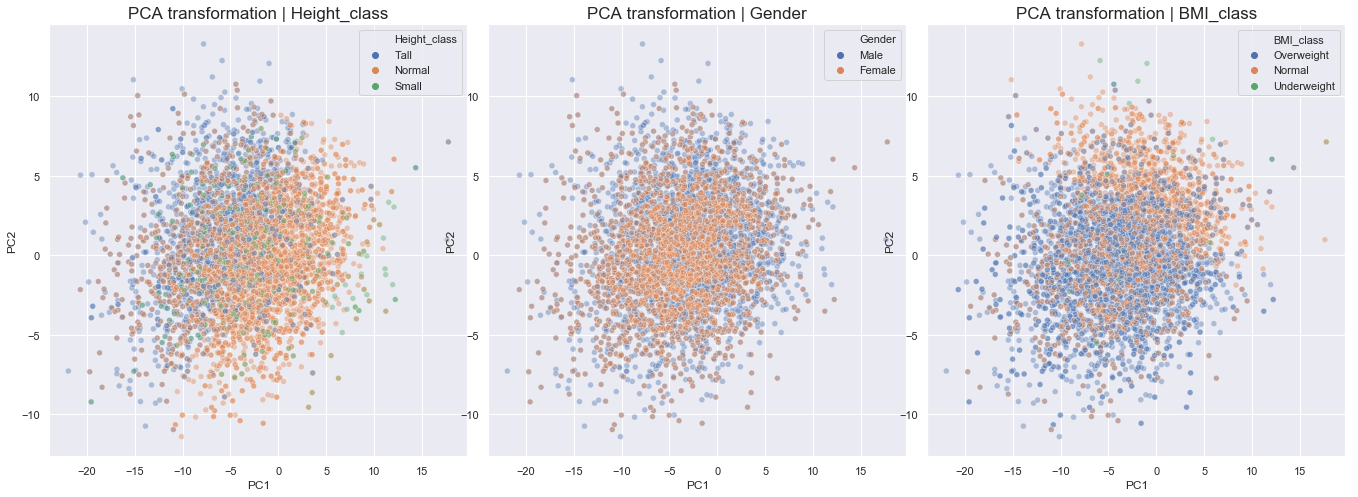

In [71]:
# Checking the effect of categorical features

print(df_categ.head())

# ploting to check if there are any clusters regarding these categorical features
df_categ['PC1'] = pd.Series(pc[:, 0])
df_categ['PC2'] = pd.Series(pc[:, 1])

plt.subplot(1, 3, 1)
sns.scatterplot('PC1', 'PC2', data=df_categ, hue='Height_class', alpha=0.4)
plt.title("PCA transformation | Height_class", fontsize=17)

plt.subplot(1, 3, 2)
sns.scatterplot('PC1', 'PC2', data=df_categ, hue='Gender', alpha=0.4)
plt.title("PCA transformation | Gender", fontsize=17)

plt.subplot(1, 3, 3)
sns.scatterplot('PC1', 'PC2', data=df_categ, hue='BMI_class', alpha=0.4)
plt.title("PCA transformation | BMI_class", fontsize=17)

plt.subplots_adjust(left=0, bottom=-0.5, right=3, top=1, wspace=0.05, hspace=0)
plt.show()


In [72]:
# PCA in a model pipeline

y = df['Gender']
X = df_numeric

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

pipe = Pipeline([('scaler', StandardScaler()), ('reducer', PCA(n_components=3)), 
                 ('classifier', RandomForestClassifier(n_estimators=100))])

pipe.fit(X_train, y_train)

print(pipe.steps[1])  # [0] é o scaler, [1] o PCA e [2] o modelo

print("\nExplained_variance_ratio_ cumulative sum:", pipe.steps[1][1].explained_variance_ratio_.cumsum())

print("\nScore:", pipe.score(X_test, y_test))


('reducer', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))

Explained_variance_ratio_ cumulative sum: [0.5591269  0.68760706 0.73883091]

Score: 0.985722130697419


Exercício 10

In [73]:
# Understanding the components

pokemon_df = pd.read_csv(data_folder + "pokemon.csv")
poke_cat_df = pokemon_df[['Type 1', 'Legendary']]
exclude = ['#', 'Total', 'Generation', 'Type 2', 'Name']

poke_df = pokemon_df.drop(poke_cat_df, axis=1).drop(exclude, axis=1).astype(float)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Build the pipeline, with the PCA transormation having 2 components only
pipe = Pipeline([('scaler', StandardScaler()), ('reducer', PCA(n_components=2))])

# Fit it to the dataset and extract the component vectors
pipe.fit(poke_df)
vectors = pipe.steps[1][1].components_.round(2)   # PCA(n_components=2).components_

# Print feature effects
print('PC 1 effects = ' + str(dict(zip(poke_df.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(poke_df.columns, vectors[1]))), "\n")

# Question: Inspect the PC 1 effects. Which statement is true?
print("""PC1 effects: All features have a similar positive effect. PC 1 can be interpreted as a measure of overall quality
(high stats).\n""")

# Question: Inspect the PC 2 effects. Which statement is true?
print("""PC2 effects: Defense has a strong positive effect on the second component and speed a strong negative one. This
component quantifies an agility vs. armor & protection trade-off.""")


PC 1 effects = {'HP': 0.39, 'Attack': 0.44, 'Defense': 0.36, 'Sp. Atk': 0.46, 'Sp. Def': 0.45, 'Speed': 0.34}
PC 2 effects = {'HP': 0.08, 'Attack': -0.01, 'Defense': 0.63, 'Sp. Atk': -0.31, 'Sp. Def': 0.24, 'Speed': -0.67} 

PC1 effects: All features have a similar positive effect. PC 1 can be interpreted as a measure of overall quality
(high stats).

PC2 effects: Defense has a strong positive effect on the second component and speed a strong negative one. This
component quantifies an agility vs. armor & protection trade-off.


Exercício 11

[[-1.5563747  -0.02148212]
 [-0.36286656 -0.05026854]
 [ 1.28015158 -0.06272022]
 ...
 [ 2.45821626 -0.51588158]
 [ 3.5303971  -0.95106516]
 [ 2.23378629  0.53762985]]


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


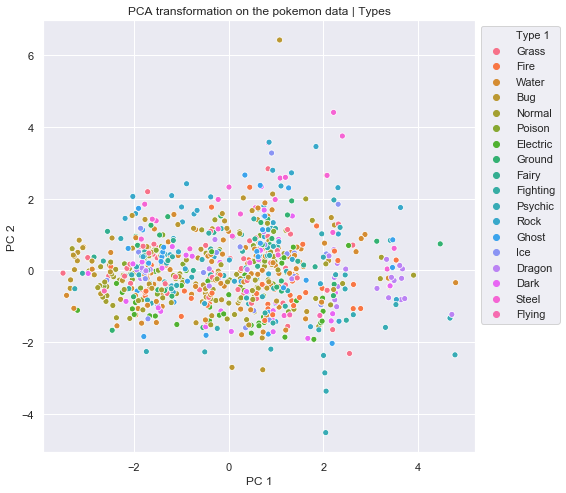

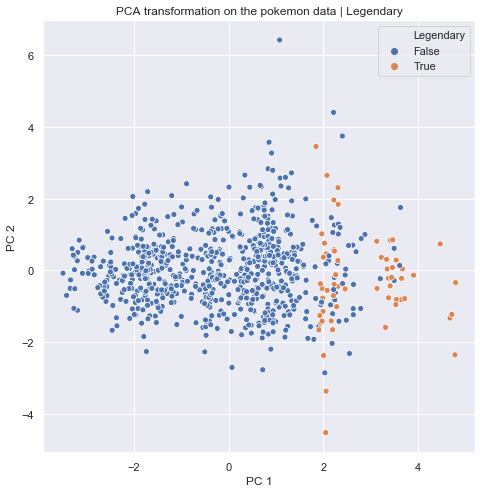

Looks like the different types are scattered all over the place while the legendary pokemon always score high for
PC 1 meaning they have high stats overall. Their spread along the PC 2 axis tells us they aren't consistently fast and 
vulnerable or slow and armored.


In [74]:
# PCA for feature exploration

# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)
print(pc)

# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

# Use the Type feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, x='PC 1', y='PC 2', hue='Type 1')
plt.title("PCA transformation on the pokemon data | Types")

plt.subplots_adjust(left=0, bottom=-0.5, right=1, top=1, wspace=0.05, hspace=0)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# Use the Legendary feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, x='PC 1', y='PC 2', hue='Legendary')

plt.title("PCA transformation on the pokemon data | Legendary")
plt.subplots_adjust(left=0, bottom=-0.5, right=1, top=1, wspace=0.05, hspace=0)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

print("""Looks like the different types are scattered all over the place while the legendary pokemon always score high for
PC 1 meaning they have high stats overall. Their spread along the PC 2 axis tells us they aren't consistently fast and 
vulnerable or slow and armored.""")

Exercício 12

In [75]:
# PCA in a model pipeline

# We just saw that legendary pokemon tend to have higher stats overall. Let's see if we can add a classifier to our pipeline
# that detects legendary versus non-legendary pokemon based on the principal components.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

y = poke_cat_df['Legendary']
X = poke_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('reducer', PCA(n_components=2)), 
                 ('classifier', RandomForestClassifier(n_estimators=100, random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Prints the explained variance ratio
print(pipe.steps[1][1].explained_variance_ratio_)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the model accuracy
print('\nWith 2 components: {0:.1%} test set accuracy\n'.format(accuracy))

###############################
print("======================================================================\n")

pipe = Pipeline([('scaler', StandardScaler()), ('reducer', PCA(n_components=3)), 
                 ('classifier', RandomForestClassifier(n_estimators=100, random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Prints the explained variance ratio
print(pipe.steps[1][1].explained_variance_ratio_)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the model accuracy
print('\nWith 3 components: {0:.1%} test set accuracy'.format(accuracy))

# era suposto o score não aumentar

[0.45673596 0.18599109]

With 2 components: 92.1% test set accuracy


[0.45673596 0.18599109 0.12852181]

With 3 components: 93.8% test set accuracy


#### Exercício 13 - Principal Component selection

5


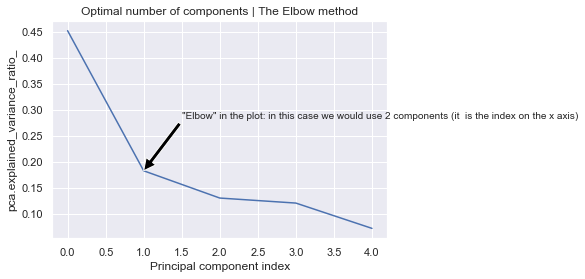

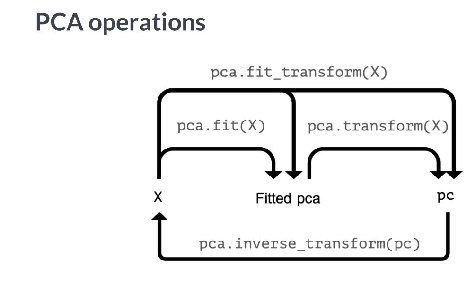

Compressing images
Rebuilding images


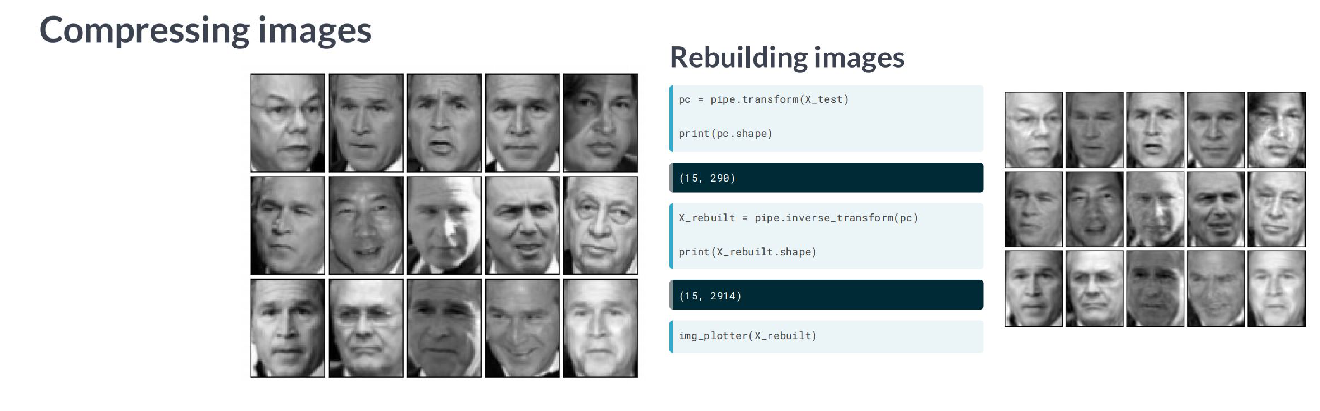

In [76]:
#vídeo

# Setting an explained variance treshold
pipe = Pipeline([('scaler', StandardScaler()), ('reducer', PCA(n_components=0.9))])

# Fit the pipe to the data
pipe.fit(poke_df)
print(len(pipe.steps[1][1].components_))


# An optimal number of components
var = pipe.steps[1][1].explained_variance_ratio_

plt.plot(var)

plt.annotate(s='"Elbow" in the plot: in this case we would use 2 components (it  is the index on the x axis)',
             xy=(1, var[1]), xytext=(1+0.5, var[1]+0.10), 
             arrowprops=dict(facecolor='black'))

plt.title("Optimal number of components | The Elbow method")
plt.xlabel('Principal component index')
plt.ylabel('pca.explained_variance_ratio_')
plt.show()


# PCA operations
image = plt.imread(data_folder + "pca_operations.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()


# Compressing images
print("Compressing images")

# print(X_test.shape)
# print(X_train.shape)
# pipe = Pipeline([('scaler', StandardScaler()), ('reducer', PCA(n_components=290))])
# pipe.fit(X_train)
# pc = pipe.fit_transform(X_test)
# print(pc.shape)

plt.subplot(1, 2, 1)
image = plt.imread(data_folder + "compressing_images.jpg")
plt.axis('off')
plt.imshow(image)

# Rebuilding images
print("Rebuilding images")

# pc = pipe.transform(X_test)
# print(pc.shape)
# X_rebuilt = pipe.inverse_transform(pc)
# print(X_rebuilt.shape)
# img_plotter(X_rebuilt)

plt.subplot(1, 2, 2)
image = plt.imread(data_folder + "rebuilding_images.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=-0.3, right=3, top=1, wspace=0, hspace=0)
plt.show()


Exercício 14

In [77]:
# Selecting the proportion of variance to keep

ansur_df_female_numeric = ansur_df_female_numeric.astype(float)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Pipe a scaler to PCA selecting 80% of the variance
pipe = Pipeline([('scaler', StandardScaler()), ('reducer', PCA(n_components=0.8))])

# Fit the pipe to the data
pipe.fit(ansur_df_female_numeric)

print('PCA selecting 80% of the variance: {} components selected'.format(len(pipe.steps[1][1].components_)))

###############

# Let PCA select 90% of the variance
pipe = Pipeline([('scaler', StandardScaler()), ('reducer', PCA(n_components=0.9))])

# Fit the pipe to the data
pipe.fit(ansur_df_female_numeric)

print('PCA selecting 90% of the variance: {} components selected'.format(len(pipe.steps[1][1].components_)))

###########

# Question: How many additional features do you need to explain 90% instead of 80% of the variance? ---> Answer: 12


PCA selecting 80% of the variance: 11 components selected
PCA selecting 90% of the variance: 23 components selected


Exercício 15

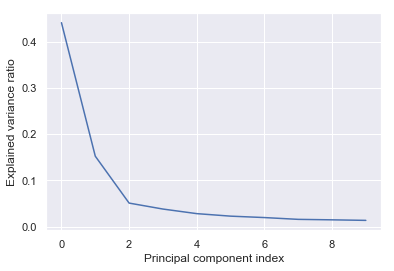

We can reduce the dataset to 3 components without compromising too much on explained variance


In [78]:
# Choosing the number of components

# Pipeline a scaler and pca selecting 10 components
pipe = Pipeline([('scaler', StandardScaler()), ('reducer', PCA(n_components=10))])

# Fit the pipe to the data
pipe.fit(ansur_df_female_numeric)

# Plot the explained variance ratio
plt.plot(pipe.steps[1][1].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

# Question
# To how many components can you reduce the dataset without compromising too much on explained variance? 
# Note that the x-axis is zero indexed.
print("""We can reduce the dataset to 3 components without compromising too much on explained variance""")

Exercício 16

In [79]:
%%script false
# PCA for image compression (MNIST dataset)

# You'll reduce the size of 16 images with hand written digits (MNIST dataset) using PCA.
# The samples are 28 by 28 pixel gray scale images that have been flattened to arrays with 784 elements each (28 x 28 = 784)
# and added to the 2D numpy array X_test. Each of the 784 pixels has a value between 0 and 255 and can be regarded as a 
# feature.

# A pipeline with a scaler and PCA model to select 78 components has been pre-loaded for you as pipe. This pipeline has 
# already been fitted to the entire MNIST dataset except for the 16 samples in X_test.

# Finally, a function plot_digits has been created for you that will plot 16 images in a grid.

###############################################

# Plot the MNIST sample data
plot_digits(X_test)

# Transform the input data to principal components
pc = pipe.transform(X_test)

# Prints the number of features per dataset
print("X_test has {} features".format(X_test.shape[1]))
print("pc has {} features".format(pc.shape[1]))

#######

# Inverse transform the components to original feature space
X_rebuilt = pipe.inverse_transform(pc)

# Prints the number of features
print("X_rebuilt has {} features".format(X_rebuilt.shape[1]))

#######

# Plot the reconstructed data
plot_digits(X_rebuilt)


Couldn't find program: 'false'


Exercício 17

In [80]:
#vídeo

# Fim